<a href="https://colab.research.google.com/github/fanroyi/E4511-2021-Fan/blob/main/Training_and_Hypertune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install AMPL packages

In [50]:
%tensorflow_version 1.x

In [51]:
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! chmod +x Anaconda3-2019.10-Linux-x86_64.sh
! bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local

# ! wget -c https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh 
# ! chmod +x Miniconda3-py37_4.9.2-Linux-x86_64.sh
# ! time bash Miniconda3-py37_4.9.2-Linux-x86_64.sh -b -f -p /usr/local

! time conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-04-06 02:05:21--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [52]:
!pip install mordred
!pip install --upgrade bravado
!pip install molvs

Requirement already up-to-date: bravado in /usr/local/lib/python3.7/site-packages (11.0.3)


In [53]:
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

--2021-04-06 02:10:41--  https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1100 (1.1K) [text/plain]
Saving to: ‘install_AMPL_GPU_test.sh.1’

install_AMPL_GPU_te 100%[===================>]   1.07K  --.-KB/s    in 0s      

2021-04-06 02:10:41 (36.4 MB/s) - ‘install_AMPL_GPU_test.sh.1’ saved [1100/1100]



In [54]:
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

mkdir: cannot create directory ‘github’: File exists
fatal: destination path 'AMPL' already exists and is not an empty directory.
M	atomsci/ddm/__init__.py
M	atomsci/ddm/pipeline/transformations.py
Already on 'pkg_upgrade'
Your branch is up to date with 'origin/pkg_upgrade'.
patching file /content/github/AMPL/atomsci/ddm/pipeline/transformations.py
Reversed (or previously applied) patch detected!  Skipping patch.
1 out of 1 hunk ignored -- saving rejects to file /content/github/AMPL/atomsci/ddm/pipeline/transformations.py.rej
patching file /content/github/AMPL/atomsci/ddm/__init__.py
Reversed (or previously applied) patch detected!  Skipping patch.
1 out of 1 hunk ignored -- saving rejects to file /content/github/AMPL/atomsci/ddm/__init__.py.rej
running build
running build_py
running egg_info
writing /content/github/AMPL.build/ampl/atomsci_ampl.egg-info/PKG-INFO
writing dependency_links to /content/github/AMPL.build/ampl/atomsci_ampl.egg-info/dependency_links.txt
writing namespace_pack

In [55]:
! wget https://raw.githubusercontent.com/fanroyi/E4511-2021-Fan/main/Dataset/curated_combined_df.csv

--2021-04-06 02:10:44--  https://raw.githubusercontent.com/fanroyi/E4511-2021-Fan/main/Dataset/curated_combined_df.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 633765 (619K) [text/plain]
Saving to: ‘curated_combined_df.csv.1’

curated_combined_df 100%[===================>] 618.91K  --.-KB/s    in 0.05s   

2021-04-06 02:10:44 (11.3 MB/s) - ‘curated_combined_df.csv.1’ saved [633765/633765]



In [56]:
!pip install hyperopt

### Load packages and dataset

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context("poster")
sns.set_style("whitegrid")
sns.set_palette("Set2")

import pandas as pd
import os, json, sys, glob, pickle

from atomsci.ddm.pipeline import model_pipeline as mp
from atomsci.ddm.pipeline import parameter_parser as parse
from atomsci.ddm.pipeline import perf_data

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

In [58]:
df = pd.read_csv("curated_combined_df.csv",index_col = 0)

In [59]:
df

,compound_id,base_rdkit_smiles,PXC50,active,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,JOJYHYRCIYAVHN-UHFFFAOYSA-N,Cc1ccc(Sc2ccccc2N2CCNCC2)c(C)c1,4.408935,0,4.409468,0.000753,0.012072,0
1,CKLPLPZSUQEDRT-WPCRTTGESA-N,C[C@H]1Cc2c([nH]c3cc(Cl)c(F)cc23)[C@@]2(N1)C(=...,5.266001,0,5.268000,0.002828,0.037958,0
2,HHVBUSGGPUQAOP-UHFFFAOYSA-N,Cc1cccc(Sc2ccccc2N2CCNCC2)c1C,4.397940,0,4.399313,0.001189,0.031217,0
3,RJOWFEDJGNNCDF-UHFFFAOYSA-N,Clc1ccc(Sc2ccccc2N2CCNCC2)c(Cl)c1,4.468521,0,4.469507,0.000854,0.022059,0
4,REFJWTPEDVJJIY-UHFFFAOYSA-N,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,4.991400,0,4.990700,0.000990,0.014024,0
...,...,...,...,...,...,...,...,...
8108,CHEMBL1372952,COc1ccc2[nH]c(Sc3c([N+](=O)[O-])nc(C)n3Cc3cccc...,4.800000,0,4.800000,NaN,0.000000,0
8109,CHEMBL1335370,O=C(CSc1ccccc1)Nc1ccc(N2CCN(c3ccccc3)CC2)c(F)c1,6.350000,1,6.350000,NaN,0.000000,0
8110,CHEMBL103,CC(=O)[C@H]1CC[C@H]2[C@@H]3CC=C4CC(=O)CC[C@]4(...,5.260000,1,5.260000,NaN,0.000000,0
8111,CHEMBL1522767,NC(=NOC(=O)Cc1ccc(-c2ccccc2)cc1)c1cccc([N+](=O...,5.000000,1,5.000000,NaN,0.000000,0


## Data Clean


In [60]:
# findout duplicated, or we can't train model
df[df.compound_id.duplicated(keep=False)==True].sort_values(by='compound_id')

,compound_id,base_rdkit_smiles,PXC50,active,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
2130,CHEMBL100917,CCCCc1ccccc1NC=NO,4.38,0,4.38000,NaN,0.000000,0
953,CHEMBL100917,CCCCc1ccccc1/N=C/NO,4.38,0,4.38000,NaN,0.000000,0
7730,CHEMBL1081860,N#Cc1ccc(S(=O)(=O)Nc2ccc3c(c2)CCN(Cc2ccn[nH]2)...,5.60,1,5.60000,NaN,0.000000,0
257,CHEMBL1081860,N#Cc1ccc(S(=O)(=O)Nc2ccc3c(c2)CCN(Cc2cc[nH]n2)...,5.60,0,5.60103,0.001457,0.018389,0
6474,CHEMBL115769,COc1cc(N)nc2[nH]c(-c3ccc(F)cc3)c(-c3ccncc3)c12,6.00,1,6.00000,NaN,0.000000,0
...,...,...,...,...,...,...,...,...
1086,CHEMBL485327,O=C(CCc1cn2c(n1)sc1cc(O)ccc12)NC1=C(C(=O)O)CCC1,4.92,0,4.92000,NaN,0.000000,0
7625,CHEMBL513491,O=C(O)c1cccc(Cc2cc(Cl)ccc2OCc2ccc(F)cc2Cl)n1,4.82,0,4.82000,NaN,0.000000,0
480,CHEMBL513491,O=C([O-])c1cccc(Cc2cc(Cl)ccc2OCc2ccc(F)cc2Cl)n1,4.82,0,4.82000,NaN,0.000000,0
5964,CHEMBL524472,C[C@@H](NC1C(=O)C(=O)C1=Nc1ccn[nH]1)c1ccccc1,4.92,0,4.92000,NaN,0.000000,0


In [61]:
df_grouped = df.groupby('compound_id', as_index=False)['VALUE_NUM_mean'].mean()
df_dedup = df.drop_duplicates('compound_id')
df_avg = df_dedup.merge(df_grouped, left_on='compound_id', right_on='compound_id')

df_avg.drop('VALUE_NUM_mean_x', axis=1, inplace=True)
df_avg.rename(columns={'VALUE_NUM_mean_y': 'VALUE_NUM_mean'}, inplace=True)

df_avg.to_csv('curated_combined_df_1.csv')

### Split the dataset

In [62]:
train_file = "curated_combined_df_1.csv"
response_col = "VALUE_NUM_mean"
compound_id = "compound_id"
smiles_col = "base_rdkit_smiles"

params = {
        "system": "LC",
        "lc_account": 'None',
        "datastore": "False",
        "save_results": "False",
        "data_owner": "username",
        "prediction_type": "regression",
        "dataset_key": train_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "previously_split": "False",
        "split_only": "True",
        "featurizer": "ecfp",
        "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '70',
        "rerun": "False",
        "result_dir": "split"
    }

ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

number of features: 1024


2021-04-06 02:11:36,371 Splitting data by scaffold
2021-04-06 02:11:42,581 Dataset split table saved to /curated_combined_df_1_train_valid_test_scaffold_274174cf-2a2d-44a0-ab69-2cbc57e2678c.csv


[]

### Train an initial model

In [67]:
listing = glob.glob(os.path.join("/", "curated_combined_df_1_train_valid_test_scaffold_*"))
name = listing[0]
split_uuid = name.split("_")[-1].split(".")[0]
response_col = "VALUE_NUM_mean"

params = {
        "system": "LC",
        "lc_account": 'None',
        "datastore": "False",
        "save_results": "False",
        "data_owner": "username",
        "prediction_type": "regression",
        "dataset_key": train_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "split_uuid": split_uuid,
        "previously_split": "True",
        "featurizer": "ecfp",
        "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '70',
        "rerun": "False",
        "result_dir": "ampl_output"
    }

In [68]:
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

number of features: 1024


2021-04-06 02:15:00,498 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.351 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.


2021-04-06 02:15:20,691 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/99d16225-05de-44c1-bfd8-88256d2ddc0d/model_metadata.json
2021-04-06 02:15:23,316 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/99d16225-05de-44c1-bfd8-88256d2ddc0d/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_99d16225-05de-44c1-bfd8-88256d2ddc0d.tar.gz


In [69]:
pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
pred_results = pred_data.get_prediction_results()
print(f"R2 score of validation set: {pred_results['r2_score']:.3f}")

R2 score of validation set: 0.078


### Train an model with uncertainty prediction

In [74]:
listing = glob.glob(os.path.join("/", "curated_combined_df_1_train_valid_test_scaffold_*"))
name = listing[0]
split_uuid = name.split("_")[-1].split(".")[0]
response_col = "VALUE_NUM_mean"

params = {
        "system": "LC",
        "lc_account": 'None',
        "datastore": "False",
        "save_results": "False",
        "data_owner": "username",
        "prediction_type": "regression",
        "dataset_key": train_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "split_uuid": split_uuid,
        "previously_split": "True",
        "featurizer": "ecfp",
        "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '70',
        "rerun": "False",
        "result_dir": "ampl_output",
        "uncertainty": "True"
    }

In [75]:
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

number of features: 1024


2021-04-06 02:18:18,918 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.347 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 02:18:37,764 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6cb52930-62e9-456b-a273-70f4b3279880/model_metadata.json
2021-04-06 02:18:40,446 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6cb52930-62e9-456b-a273-70f4b3279880/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6cb52930-62e9-456b-a273-70f4b3279880.tar.gz


In [81]:
pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
pred_results = pred_data.get_prediction_results()
print(f"R2 score of validation set: {pred_results['r2_score']:.3f}")

R2 score of validation set: 0.073


In [80]:
pred_df = pl.predict_on_dataframe(df)
pred_df = pred_df.merge(df[["base_rdkit_smiles", "VALUE_NUM_mean"]], on="base_rdkit_smiles")
pred_df = pred_df.assign(pred_error=pred_df.VALUE_NUM_mean-pred_df.pred)

2021-04-06 02:29:47,450 Featurizing data...
2021-04-06 02:30:23,570 Done


number of features: 1024
TIMING: dataset construction took 0.454 s
Loading dataset from disk.


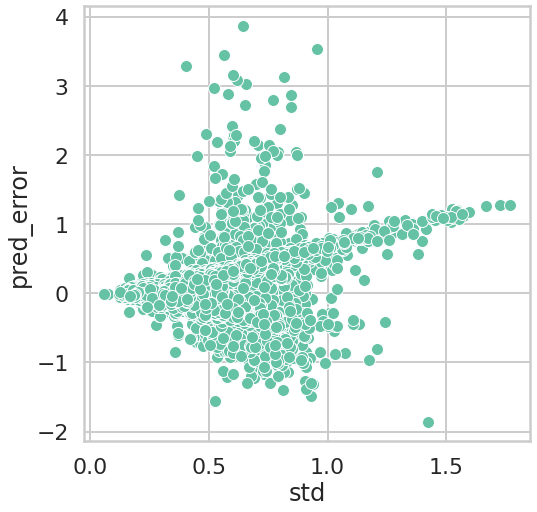

In [82]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.scatterplot(data=pred_df, x="std", y="pred_error", ax=ax)

### Grid search
#### Tunable parameters for Random Forest models
- rf_estimators: number of estimators to use in random forest models
- rf_max_depth: the maximum depth of a decision tree in the random forest
- rf_max_features: max number of features to split random forest nodes

In [83]:
param_choice = [16,32,64,128]

rfe_list = []
rfd_list = []
rff_list = []
valid_r2_list = []
for rf_estimator in param_choice:
    for rf_depth in param_choice:
        for rf_feature in param_choice:
            params["rf_estimators"] = rf_estimator
            params["rf_max_depth"] = rf_depth
            params["rf_max_features"] = rf_feature
            rfe_list.append(rf_estimator)
            rfd_list.append(rf_depth)
            rff_list.append(rf_feature)
            tp = parse.wrapper(params)
            pl = mp.ModelPipeline(tp)
            pl.train_model()
            pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
            pred_results = pred_data.get_prediction_results()
            valid_r2 = pred_results['r2_score']
            valid_r2_list.append(valid_r2)
            print(f"rf_estimators: {rf_estimator}, rf_max_depth: {rf_depth}, rf_max_features: {rf_feature}, valid_r2: {valid_r2}")

number of features: 1024


2021-04-06 02:37:23,384 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.368 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.077 s
Loading dataset from disk.


2021-04-06 02:37:27,258 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/3a66bbf9-1008-4418-b774-a1f3bb84aa72/model_metadata.json
2021-04-06 02:37:27,284 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/3a66bbf9-1008-4418-b774-a1f3bb84aa72/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_3a66bbf9-1008-4418-b774-a1f3bb84aa72.tar.gz
rf_estimators: 16, rf_max_depth: 16, rf_max_features: 16, valid_r2: 0.05218764653545893
number of features: 1024


2021-04-06 02:38:08,953 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.348 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.


2021-04-06 02:38:12,159 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/285aea26-ae15-4cb2-b9fc-9b8f1dd3f0c8/model_metadata.json
2021-04-06 02:38:12,183 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/285aea26-ae15-4cb2-b9fc-9b8f1dd3f0c8/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_285aea26-ae15-4cb2-b9fc-9b8f1dd3f0c8.tar.gz
rf_estimators: 16, rf_max_depth: 16, rf_max_features: 32, valid_r2: 0.054875288791318755
number of features: 1024


2021-04-06 02:38:50,261 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.355 s
Loading dataset from disk.
TIMING: dataset construction took 0.059 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 02:38:53,580 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7117abe3-aaa6-483e-8060-7f9895847bf1/model_metadata.json
2021-04-06 02:38:53,604 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7117abe3-aaa6-483e-8060-7f9895847bf1/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_7117abe3-aaa6-483e-8060-7f9895847bf1.tar.gz
rf_estimators: 16, rf_max_depth: 16, rf_max_features: 64, valid_r2: 0.0707924519075348
number of features: 1024


2021-04-06 02:39:31,087 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.353 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 02:39:34,791 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8c98ef85-216e-4bd0-9db4-97aef4765bea/model_metadata.json
2021-04-06 02:39:34,815 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8c98ef85-216e-4bd0-9db4-97aef4765bea/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_8c98ef85-216e-4bd0-9db4-97aef4765bea.tar.gz
rf_estimators: 16, rf_max_depth: 16, rf_max_features: 128, valid_r2: 0.0711888863828326
number of features: 1024


2021-04-06 02:40:12,224 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.346 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 02:40:15,493 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/bea331bf-a66b-4489-abb9-9559b84a60ae/model_metadata.json
2021-04-06 02:40:15,550 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/bea331bf-a66b-4489-abb9-9559b84a60ae/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_bea331bf-a66b-4489-abb9-9559b84a60ae.tar.gz
rf_estimators: 16, rf_max_depth: 32, rf_max_features: 16, valid_r2: 0.05992724165709207
number of features: 1024


2021-04-06 02:40:53,023 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.352 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 02:40:56,347 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e565d3ad-6a1b-441f-8c25-626aeb662f28/model_metadata.json
2021-04-06 02:40:56,400 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e565d3ad-6a1b-441f-8c25-626aeb662f28/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_e565d3ad-6a1b-441f-8c25-626aeb662f28.tar.gz
rf_estimators: 16, rf_max_depth: 32, rf_max_features: 32, valid_r2: 0.05063133783663332
number of features: 1024


2021-04-06 02:41:33,661 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.344 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 02:41:37,191 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e2d7ff79-6a1a-4ac9-9d5c-4be0471fcb33/model_metadata.json
2021-04-06 02:41:37,240 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e2d7ff79-6a1a-4ac9-9d5c-4be0471fcb33/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_e2d7ff79-6a1a-4ac9-9d5c-4be0471fcb33.tar.gz
rf_estimators: 16, rf_max_depth: 32, rf_max_features: 64, valid_r2: 0.043239711118595925
number of features: 1024


2021-04-06 02:42:14,578 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.338 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.


2021-04-06 02:42:18,504 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fc24e3d6-3ea0-4831-989b-ef136a8bc823/model_metadata.json
2021-04-06 02:42:18,558 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fc24e3d6-3ea0-4831-989b-ef136a8bc823/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_fc24e3d6-3ea0-4831-989b-ef136a8bc823.tar.gz
rf_estimators: 16, rf_max_depth: 32, rf_max_features: 128, valid_r2: 0.06532137890920164
number of features: 1024


2021-04-06 02:42:56,135 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.353 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 02:42:59,397 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6978e11e-4aeb-43d6-abac-b6e3360803b6/model_metadata.json
2021-04-06 02:42:59,484 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6978e11e-4aeb-43d6-abac-b6e3360803b6/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6978e11e-4aeb-43d6-abac-b6e3360803b6.tar.gz
rf_estimators: 16, rf_max_depth: 64, rf_max_features: 16, valid_r2: 0.05450993277688698
number of features: 1024


2021-04-06 02:43:37,696 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.368 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.


2021-04-06 02:43:41,303 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ed14e96f-f351-44a8-9d51-29201a3f5113/model_metadata.json
2021-04-06 02:43:41,391 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ed14e96f-f351-44a8-9d51-29201a3f5113/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_ed14e96f-f351-44a8-9d51-29201a3f5113.tar.gz
rf_estimators: 16, rf_max_depth: 64, rf_max_features: 32, valid_r2: 0.059895253712397345
number of features: 1024


2021-04-06 02:44:20,441 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.356 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 02:44:24,260 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/48cb8dbd-5abb-414f-b84c-69a9f79bc9b0/model_metadata.json
2021-04-06 02:44:24,354 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/48cb8dbd-5abb-414f-b84c-69a9f79bc9b0/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_48cb8dbd-5abb-414f-b84c-69a9f79bc9b0.tar.gz
rf_estimators: 16, rf_max_depth: 64, rf_max_features: 64, valid_r2: 0.06147153445980924
number of features: 1024


2021-04-06 02:45:03,437 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.343 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.


2021-04-06 02:45:07,883 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/11129cac-1ed6-461c-92ec-55aa3f6db8ef/model_metadata.json
2021-04-06 02:45:07,963 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/11129cac-1ed6-461c-92ec-55aa3f6db8ef/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_11129cac-1ed6-461c-92ec-55aa3f6db8ef.tar.gz
rf_estimators: 16, rf_max_depth: 64, rf_max_features: 128, valid_r2: 0.05726515848480962
number of features: 1024


2021-04-06 02:45:45,855 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.344 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.


2021-04-06 02:45:49,118 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e04f5be7-541b-4494-a9a7-5c1c91f7857e/model_metadata.json
2021-04-06 02:45:49,211 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e04f5be7-541b-4494-a9a7-5c1c91f7857e/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_e04f5be7-541b-4494-a9a7-5c1c91f7857e.tar.gz
rf_estimators: 16, rf_max_depth: 128, rf_max_features: 16, valid_r2: 0.04309737604249997
number of features: 1024


2021-04-06 02:46:26,701 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.345 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 02:46:30,095 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/71890528-e804-4486-9fc1-a0ca113c7117/model_metadata.json
2021-04-06 02:46:30,183 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/71890528-e804-4486-9fc1-a0ca113c7117/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_71890528-e804-4486-9fc1-a0ca113c7117.tar.gz
rf_estimators: 16, rf_max_depth: 128, rf_max_features: 32, valid_r2: 0.04460819840110697
number of features: 1024


2021-04-06 02:47:07,547 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.342 s
Loading dataset from disk.
TIMING: dataset construction took 0.059 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 02:47:11,231 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e8f3dec8-f971-4fe2-a61c-b4afe3e80d04/model_metadata.json
2021-04-06 02:47:11,325 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e8f3dec8-f971-4fe2-a61c-b4afe3e80d04/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_e8f3dec8-f971-4fe2-a61c-b4afe3e80d04.tar.gz
rf_estimators: 16, rf_max_depth: 128, rf_max_features: 64, valid_r2: 0.05965582328804009
number of features: 1024


2021-04-06 02:47:48,663 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.341 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 02:47:52,920 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/0d75b6ec-36bb-407e-94d4-41e2b7800f56/model_metadata.json
2021-04-06 02:47:53,010 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/0d75b6ec-36bb-407e-94d4-41e2b7800f56/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_0d75b6ec-36bb-407e-94d4-41e2b7800f56.tar.gz
rf_estimators: 16, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.04273758472260292
number of features: 1024


2021-04-06 02:48:30,192 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.346 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 02:48:33,359 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/390054fc-b72c-4f83-9b9b-986957037c3e/model_metadata.json
2021-04-06 02:48:33,398 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/390054fc-b72c-4f83-9b9b-986957037c3e/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_390054fc-b72c-4f83-9b9b-986957037c3e.tar.gz
rf_estimators: 32, rf_max_depth: 16, rf_max_features: 16, valid_r2: 0.05166183097258503
number of features: 1024


2021-04-06 02:49:10,379 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.349 s
Loading dataset from disk.
TIMING: dataset construction took 0.047 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 02:49:13,787 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/47c680ba-5b5b-4175-89c6-0db28c4b7e5f/model_metadata.json
2021-04-06 02:49:13,826 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/47c680ba-5b5b-4175-89c6-0db28c4b7e5f/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_47c680ba-5b5b-4175-89c6-0db28c4b7e5f.tar.gz
rf_estimators: 32, rf_max_depth: 16, rf_max_features: 32, valid_r2: 0.07586051683055506
number of features: 1024


2021-04-06 02:49:50,787 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.335 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 02:49:54,340 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e94e0f3a-a914-429f-8cf1-d1dcfa126032/model_metadata.json
2021-04-06 02:49:54,382 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e94e0f3a-a914-429f-8cf1-d1dcfa126032/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_e94e0f3a-a914-429f-8cf1-d1dcfa126032.tar.gz
rf_estimators: 32, rf_max_depth: 16, rf_max_features: 64, valid_r2: 0.0800131636182907
number of features: 1024


2021-04-06 02:50:31,317 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.337 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 02:50:35,595 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2dfe6800-245a-42a1-bda0-dca70bbeb081/model_metadata.json
2021-04-06 02:50:35,634 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2dfe6800-245a-42a1-bda0-dca70bbeb081/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_2dfe6800-245a-42a1-bda0-dca70bbeb081.tar.gz
rf_estimators: 32, rf_max_depth: 16, rf_max_features: 128, valid_r2: 0.07966236346386346
number of features: 1024


2021-04-06 02:51:12,652 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.344 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 02:51:16,025 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/77363f13-ed57-4275-91b5-158bc7e034c6/model_metadata.json
2021-04-06 02:51:16,119 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/77363f13-ed57-4275-91b5-158bc7e034c6/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_77363f13-ed57-4275-91b5-158bc7e034c6.tar.gz
rf_estimators: 32, rf_max_depth: 32, rf_max_features: 16, valid_r2: 0.08217911683309442
number of features: 1024


2021-04-06 02:51:54,064 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.341 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 02:51:57,708 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/af0b1a6e-027b-4dcf-81a2-d0e16f02f04e/model_metadata.json
2021-04-06 02:51:57,805 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/af0b1a6e-027b-4dcf-81a2-d0e16f02f04e/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_af0b1a6e-027b-4dcf-81a2-d0e16f02f04e.tar.gz
rf_estimators: 32, rf_max_depth: 32, rf_max_features: 32, valid_r2: 0.07484751486153374
number of features: 1024


2021-04-06 02:52:34,885 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.337 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 02:52:38,936 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2861970b-da90-4ada-b902-4c8351728018/model_metadata.json
2021-04-06 02:52:39,037 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2861970b-da90-4ada-b902-4c8351728018/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_2861970b-da90-4ada-b902-4c8351728018.tar.gz
rf_estimators: 32, rf_max_depth: 32, rf_max_features: 64, valid_r2: 0.08462600818645483
number of features: 1024


2021-04-06 02:53:16,205 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.340 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 02:53:21,179 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/3ec6db8b-0514-47de-8d7e-56683e734f67/model_metadata.json
2021-04-06 02:53:21,285 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/3ec6db8b-0514-47de-8d7e-56683e734f67/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_3ec6db8b-0514-47de-8d7e-56683e734f67.tar.gz
rf_estimators: 32, rf_max_depth: 32, rf_max_features: 128, valid_r2: 0.08655940658413042
number of features: 1024


2021-04-06 02:53:58,221 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.339 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 02:54:01,767 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/435c7e08-9b99-4ccf-ace4-4f35c7a7d845/model_metadata.json
2021-04-06 02:54:01,930 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/435c7e08-9b99-4ccf-ace4-4f35c7a7d845/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_435c7e08-9b99-4ccf-ace4-4f35c7a7d845.tar.gz
rf_estimators: 32, rf_max_depth: 64, rf_max_features: 16, valid_r2: 0.06857183914115406
number of features: 1024


2021-04-06 02:54:39,195 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.347 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 02:54:43,108 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/df46620e-0907-4a39-841c-7c0eb2828e1e/model_metadata.json
2021-04-06 02:54:43,268 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/df46620e-0907-4a39-841c-7c0eb2828e1e/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_df46620e-0907-4a39-841c-7c0eb2828e1e.tar.gz
rf_estimators: 32, rf_max_depth: 64, rf_max_features: 32, valid_r2: 0.06557504144004322
number of features: 1024


2021-04-06 02:55:20,426 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.338 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 02:55:24,784 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/4cecd95a-dd8a-477d-b22e-167dd349cad3/model_metadata.json
2021-04-06 02:55:24,943 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/4cecd95a-dd8a-477d-b22e-167dd349cad3/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_4cecd95a-dd8a-477d-b22e-167dd349cad3.tar.gz
rf_estimators: 32, rf_max_depth: 64, rf_max_features: 64, valid_r2: 0.04592508326697098
number of features: 1024


2021-04-06 02:56:02,174 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.346 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 02:56:07,636 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/60e2b009-4dd8-4dc2-acc3-3df17f9abde4/model_metadata.json
2021-04-06 02:56:07,794 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/60e2b009-4dd8-4dc2-acc3-3df17f9abde4/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_60e2b009-4dd8-4dc2-acc3-3df17f9abde4.tar.gz
rf_estimators: 32, rf_max_depth: 64, rf_max_features: 128, valid_r2: 0.06580250312947278
number of features: 1024


2021-04-06 02:56:44,885 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.338 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 02:56:48,432 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/d8056db5-8e2b-4be7-b660-6081f30e68b1/model_metadata.json
2021-04-06 02:56:48,611 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/d8056db5-8e2b-4be7-b660-6081f30e68b1/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_d8056db5-8e2b-4be7-b660-6081f30e68b1.tar.gz
rf_estimators: 32, rf_max_depth: 128, rf_max_features: 16, valid_r2: 0.0689693307556164
number of features: 1024


2021-04-06 02:57:25,693 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.335 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 02:57:29,586 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6d142cef-f892-4f34-bc1a-45effd9cfa68/model_metadata.json
2021-04-06 02:57:29,772 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6d142cef-f892-4f34-bc1a-45effd9cfa68/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6d142cef-f892-4f34-bc1a-45effd9cfa68.tar.gz
rf_estimators: 32, rf_max_depth: 128, rf_max_features: 32, valid_r2: 0.04350819164129438
number of features: 1024


2021-04-06 02:58:06,821 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.339 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 02:58:11,188 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/da48beeb-fac8-478c-ba54-ef164280c65b/model_metadata.json
2021-04-06 02:58:11,363 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/da48beeb-fac8-478c-ba54-ef164280c65b/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_da48beeb-fac8-478c-ba54-ef164280c65b.tar.gz
rf_estimators: 32, rf_max_depth: 128, rf_max_features: 64, valid_r2: 0.04559317787799133
number of features: 1024


2021-04-06 02:58:48,526 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.340 s
Loading dataset from disk.
TIMING: dataset construction took 0.047 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 02:58:54,069 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2b1a3141-76b7-474a-b5a9-c3694d45b9e6/model_metadata.json
2021-04-06 02:58:54,240 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2b1a3141-76b7-474a-b5a9-c3694d45b9e6/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_2b1a3141-76b7-474a-b5a9-c3694d45b9e6.tar.gz
rf_estimators: 32, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.046999955715733344
number of features: 1024


2021-04-06 02:59:31,305 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.338 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 02:59:34,818 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/882c5035-e597-478f-85a4-1f3f4d4ef37d/model_metadata.json
2021-04-06 02:59:34,881 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/882c5035-e597-478f-85a4-1f3f4d4ef37d/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_882c5035-e597-478f-85a4-1f3f4d4ef37d.tar.gz
rf_estimators: 64, rf_max_depth: 16, rf_max_features: 16, valid_r2: 0.05846971135066925
number of features: 1024


2021-04-06 03:00:12,024 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.344 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:00:15,873 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/a1aa4a2b-f922-4d1e-ba7c-46bc5d4172df/model_metadata.json
2021-04-06 03:00:15,945 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/a1aa4a2b-f922-4d1e-ba7c-46bc5d4172df/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_a1aa4a2b-f922-4d1e-ba7c-46bc5d4172df.tar.gz
rf_estimators: 64, rf_max_depth: 16, rf_max_features: 32, valid_r2: 0.07035580532790842
number of features: 1024


2021-04-06 03:00:53,243 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.343 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 03:00:57,682 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1e89d7e2-68f5-44e4-b82c-ca36a993bbc2/model_metadata.json
2021-04-06 03:00:57,759 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1e89d7e2-68f5-44e4-b82c-ca36a993bbc2/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1e89d7e2-68f5-44e4-b82c-ca36a993bbc2.tar.gz
rf_estimators: 64, rf_max_depth: 16, rf_max_features: 64, valid_r2: 0.07011448698137479
number of features: 1024


2021-04-06 03:01:34,858 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.335 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:01:40,596 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/5d6d9f2a-84f7-4153-b00b-768546d92483/model_metadata.json
2021-04-06 03:01:40,669 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/5d6d9f2a-84f7-4153-b00b-768546d92483/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_5d6d9f2a-84f7-4153-b00b-768546d92483.tar.gz
rf_estimators: 64, rf_max_depth: 16, rf_max_features: 128, valid_r2: 0.07971474664747369
number of features: 1024


2021-04-06 03:02:17,919 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.343 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 03:02:21,816 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6f54792b-662f-464a-b915-642e67e7d019/model_metadata.json
2021-04-06 03:02:21,999 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6f54792b-662f-464a-b915-642e67e7d019/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6f54792b-662f-464a-b915-642e67e7d019.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 16, valid_r2: 0.07356326217229736
number of features: 1024


2021-04-06 03:02:58,920 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.337 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 03:03:03,308 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6bc90caf-67e1-4a24-b425-58a9bf83a5d2/model_metadata.json
2021-04-06 03:03:03,497 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6bc90caf-67e1-4a24-b425-58a9bf83a5d2/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6bc90caf-67e1-4a24-b425-58a9bf83a5d2.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 32, valid_r2: 0.09390966735673179
number of features: 1024


2021-04-06 03:03:40,676 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.344 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 03:03:45,948 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/463e0ec5-ca1b-4565-a54d-4a96a9728c7b/model_metadata.json
2021-04-06 03:03:46,140 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/463e0ec5-ca1b-4565-a54d-4a96a9728c7b/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_463e0ec5-ca1b-4565-a54d-4a96a9728c7b.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 64, valid_r2: 0.07744066891143819
number of features: 1024


2021-04-06 03:04:23,446 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.335 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:04:30,410 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6339ea58-c4cb-4db2-9b5b-b16c55370dc8/model_metadata.json
2021-04-06 03:04:30,595 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6339ea58-c4cb-4db2-9b5b-b16c55370dc8/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6339ea58-c4cb-4db2-9b5b-b16c55370dc8.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 128, valid_r2: 0.07798564459806412
number of features: 1024


2021-04-06 03:05:07,715 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.338 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 03:05:12,022 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1046dfb9-2cb2-417d-89ee-ada6a34cef91/model_metadata.json
2021-04-06 03:05:12,349 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1046dfb9-2cb2-417d-89ee-ada6a34cef91/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1046dfb9-2cb2-417d-89ee-ada6a34cef91.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 16, valid_r2: 0.07690775904244262
number of features: 1024


2021-04-06 03:05:49,474 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.338 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 03:05:54,307 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/541e0133-f498-4545-abc4-76e2cfdcf602/model_metadata.json
2021-04-06 03:05:54,614 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/541e0133-f498-4545-abc4-76e2cfdcf602/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_541e0133-f498-4545-abc4-76e2cfdcf602.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 32, valid_r2: 0.0661565478489784
number of features: 1024


2021-04-06 03:06:31,800 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.343 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:06:37,581 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/057b8f5c-fa76-4823-a332-b93c0267382d/model_metadata.json
2021-04-06 03:06:37,891 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/057b8f5c-fa76-4823-a332-b93c0267382d/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_057b8f5c-fa76-4823-a332-b93c0267382d.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 64, valid_r2: 0.08192823136639316
number of features: 1024


2021-04-06 03:07:15,183 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.342 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 03:07:23,191 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/43b4bdcd-c29a-49f1-a1ca-2114cfc1bf67/model_metadata.json
2021-04-06 03:07:23,500 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/43b4bdcd-c29a-49f1-a1ca-2114cfc1bf67/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_43b4bdcd-c29a-49f1-a1ca-2114cfc1bf67.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 128, valid_r2: 0.06869181422855042
number of features: 1024


2021-04-06 03:08:01,024 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.344 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 03:08:05,372 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/587b7313-7178-4e43-9359-7930fad22e70/model_metadata.json
2021-04-06 03:08:05,729 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/587b7313-7178-4e43-9359-7930fad22e70/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_587b7313-7178-4e43-9359-7930fad22e70.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 16, valid_r2: 0.0722443389198536
number of features: 1024


2021-04-06 03:08:43,668 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.337 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 03:08:48,629 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c416453a-8c06-4820-8309-4527a5103b41/model_metadata.json
2021-04-06 03:08:48,978 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c416453a-8c06-4820-8309-4527a5103b41/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_c416453a-8c06-4820-8309-4527a5103b41.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 32, valid_r2: 0.08749950428151165
number of features: 1024


2021-04-06 03:09:26,363 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.341 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 03:09:32,360 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ed696848-4055-40ff-8b39-c0b99a09e090/model_metadata.json
2021-04-06 03:09:32,695 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ed696848-4055-40ff-8b39-c0b99a09e090/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_ed696848-4055-40ff-8b39-c0b99a09e090.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 64, valid_r2: 0.07218635237411963
number of features: 1024


2021-04-06 03:10:10,285 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.338 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:10:18,588 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6494e9ad-9889-4948-9aec-c9ec78fe3b1f/model_metadata.json
2021-04-06 03:10:18,919 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6494e9ad-9889-4948-9aec-c9ec78fe3b1f/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6494e9ad-9889-4948-9aec-c9ec78fe3b1f.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.0811394266142299
number of features: 1024


2021-04-06 03:10:56,706 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.350 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.


2021-04-06 03:11:01,047 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/a60bb72d-5b07-437b-9998-9eaab2297a36/model_metadata.json
2021-04-06 03:11:01,180 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/a60bb72d-5b07-437b-9998-9eaab2297a36/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_a60bb72d-5b07-437b-9998-9eaab2297a36.tar.gz
rf_estimators: 128, rf_max_depth: 16, rf_max_features: 16, valid_r2: 0.0574365368696248
number of features: 1024


2021-04-06 03:11:38,686 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.354 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.


2021-04-06 03:11:43,614 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b1f936a3-2c04-4a6f-a245-34660092e15b/model_metadata.json
2021-04-06 03:11:43,759 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b1f936a3-2c04-4a6f-a245-34660092e15b/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_b1f936a3-2c04-4a6f-a245-34660092e15b.tar.gz
rf_estimators: 128, rf_max_depth: 16, rf_max_features: 32, valid_r2: 0.07268003144924196
number of features: 1024


2021-04-06 03:12:21,476 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.342 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 03:12:27,631 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/63f8284c-a59b-420e-b0c4-53c136a1ffea/model_metadata.json
2021-04-06 03:12:27,775 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/63f8284c-a59b-420e-b0c4-53c136a1ffea/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_63f8284c-a59b-420e-b0c4-53c136a1ffea.tar.gz
rf_estimators: 128, rf_max_depth: 16, rf_max_features: 64, valid_r2: 0.0810052243239805
number of features: 1024


2021-04-06 03:13:05,369 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.348 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:13:14,109 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c928655e-7d5a-4453-a06d-966f83742ef2/model_metadata.json
2021-04-06 03:13:14,246 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c928655e-7d5a-4453-a06d-966f83742ef2/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_c928655e-7d5a-4453-a06d-966f83742ef2.tar.gz
rf_estimators: 128, rf_max_depth: 16, rf_max_features: 128, valid_r2: 0.08657211667884179
number of features: 1024


2021-04-06 03:13:52,170 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.345 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.


2021-04-06 03:13:57,366 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b518f881-bc4d-417e-a1ef-4e5e24a7e574/model_metadata.json
2021-04-06 03:13:57,730 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b518f881-bc4d-417e-a1ef-4e5e24a7e574/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_b518f881-bc4d-417e-a1ef-4e5e24a7e574.tar.gz
rf_estimators: 128, rf_max_depth: 32, rf_max_features: 16, valid_r2: 0.08530422096690982
number of features: 1024


2021-04-06 03:14:35,537 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.341 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 03:14:41,614 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/68d684d0-ca94-4e07-b54b-f65ad621e3e2/model_metadata.json
2021-04-06 03:14:42,002 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/68d684d0-ca94-4e07-b54b-f65ad621e3e2/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_68d684d0-ca94-4e07-b54b-f65ad621e3e2.tar.gz
rf_estimators: 128, rf_max_depth: 32, rf_max_features: 32, valid_r2: 0.07830640961763535
number of features: 1024


2021-04-06 03:15:19,576 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.337 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.


2021-04-06 03:15:27,435 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/9a7c0a0d-49da-45c3-b76a-88680352ed24/model_metadata.json
2021-04-06 03:15:27,813 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/9a7c0a0d-49da-45c3-b76a-88680352ed24/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_9a7c0a0d-49da-45c3-b76a-88680352ed24.tar.gz
rf_estimators: 128, rf_max_depth: 32, rf_max_features: 64, valid_r2: 0.07918525807228227
number of features: 1024


2021-04-06 03:16:06,722 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.339 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 03:16:18,147 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/de44639e-ad52-4e33-bbb7-27958c2f3ed4/model_metadata.json
2021-04-06 03:16:18,511 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/de44639e-ad52-4e33-bbb7-27958c2f3ed4/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_de44639e-ad52-4e33-bbb7-27958c2f3ed4.tar.gz
rf_estimators: 128, rf_max_depth: 32, rf_max_features: 128, valid_r2: 0.08093159107365999
number of features: 1024


2021-04-06 03:16:55,949 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.343 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:17:01,798 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/5313deb7-bfc5-4177-8fb7-d0d876af01b7/model_metadata.json
2021-04-06 03:17:02,426 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/5313deb7-bfc5-4177-8fb7-d0d876af01b7/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_5313deb7-bfc5-4177-8fb7-d0d876af01b7.tar.gz
rf_estimators: 128, rf_max_depth: 64, rf_max_features: 16, valid_r2: 0.07482392849357566
number of features: 1024


2021-04-06 03:17:39,937 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.338 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 03:17:46,878 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1ecb2fbc-ce6c-4a6f-817a-1c34dedb8b46/model_metadata.json
2021-04-06 03:17:47,499 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1ecb2fbc-ce6c-4a6f-817a-1c34dedb8b46/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1ecb2fbc-ce6c-4a6f-817a-1c34dedb8b46.tar.gz
rf_estimators: 128, rf_max_depth: 64, rf_max_features: 32, valid_r2: 0.07423768587762869
number of features: 1024


2021-04-06 03:18:25,132 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.342 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 03:18:34,185 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6214de4d-2db8-4d85-8983-a2fe7d105275/model_metadata.json
2021-04-06 03:18:34,810 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6214de4d-2db8-4d85-8983-a2fe7d105275/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6214de4d-2db8-4d85-8983-a2fe7d105275.tar.gz
rf_estimators: 128, rf_max_depth: 64, rf_max_features: 64, valid_r2: 0.07865024908506912
number of features: 1024


2021-04-06 03:19:12,394 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.340 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 03:19:25,409 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7f932dc6-b87e-4e74-8202-c0b7b6e7d9cb/model_metadata.json
2021-04-06 03:19:26,016 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7f932dc6-b87e-4e74-8202-c0b7b6e7d9cb/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_7f932dc6-b87e-4e74-8202-c0b7b6e7d9cb.tar.gz
rf_estimators: 128, rf_max_depth: 64, rf_max_features: 128, valid_r2: 0.08172422525379941
number of features: 1024


2021-04-06 03:20:03,535 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.344 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.


2021-04-06 03:20:09,602 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/452647e5-3c00-4981-a428-3d9765019bd8/model_metadata.json
2021-04-06 03:20:10,308 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/452647e5-3c00-4981-a428-3d9765019bd8/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_452647e5-3c00-4981-a428-3d9765019bd8.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 16, valid_r2: 0.07722287144745477
number of features: 1024


2021-04-06 03:20:47,861 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.337 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 03:20:54,988 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/11bdf70d-00c5-4215-9b2a-ea59b7737f2d/model_metadata.json
2021-04-06 03:20:55,667 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/11bdf70d-00c5-4215-9b2a-ea59b7737f2d/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_11bdf70d-00c5-4215-9b2a-ea59b7737f2d.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 32, valid_r2: 0.0848843964099788
number of features: 1024


2021-04-06 03:21:32,960 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.336 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:21:42,165 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/853f8cb4-572c-4cd6-ba7f-b45a09728f5e/model_metadata.json
2021-04-06 03:21:42,844 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/853f8cb4-572c-4cd6-ba7f-b45a09728f5e/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_853f8cb4-572c-4cd6-ba7f-b45a09728f5e.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 64, valid_r2: 0.07996194541191326
number of features: 1024


2021-04-06 03:22:20,476 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.339 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 03:22:34,083 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/98260e53-fea6-4074-8f23-16f0e27ff849/model_metadata.json
2021-04-06 03:22:34,732 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/98260e53-fea6-4074-8f23-16f0e27ff849/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_98260e53-fea6-4074-8f23-16f0e27ff849.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.07932794445902613


In [84]:
perf_df = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": valid_r2_list})
perf_df.sort_values(by="valid_r2_score", ascending=False)

,rf_estimators,rf_max_depth,rf_max_features,valid_r2_score
37,64,32,32,0.093910
45,64,128,32,0.087500
51,128,16,128,0.086572
23,32,32,128,0.086559
52,128,32,16,0.085304
...,...,...,...,...
13,16,128,32,0.044608
29,32,128,32,0.043508
6,16,32,64,0.043240
12,16,128,16,0.043097


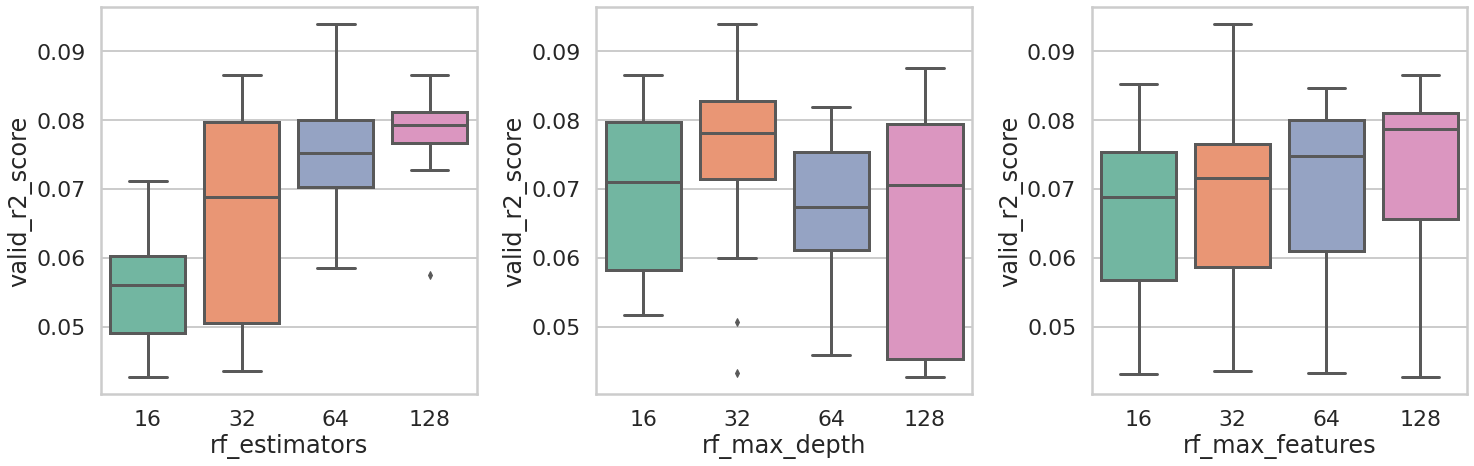

In [85]:
fig, ax = plt.subplots(1,3,figsize=(21,7))
sns.boxplot(data=perf_df, x="rf_estimators", y="valid_r2_score", ax=ax[0])
sns.boxplot(data=perf_df, x="rf_max_depth", y="valid_r2_score", ax=ax[1])
sns.boxplot(data=perf_df, x="rf_max_features", y="valid_r2_score", ax=ax[2])
fig.tight_layout()

### Random search

In [86]:
rfe_list = []
rfd_list = []
rff_list = []
valid_r2_list = []

num_trials = 50

for i in range(num_trials):
    params["rf_estimators"] = np.random.randint(8,256)
    params["rf_max_depth"] = np.random.randint(8,256)
    params["rf_max_features"] = np.random.randint(8,256)
    rfe_list.append(params["rf_estimators"])
    rfd_list.append(params["rf_max_depth"])
    rff_list.append(params["rf_max_features"])
    tp = parse.wrapper(params)
    pl = mp.ModelPipeline(tp)
    pl.train_model()
    pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
    pred_results = pred_data.get_prediction_results()
    valid_r2 = pred_results['r2_score']
    valid_r2_list.append(valid_r2)
    print(f"rf_estimators: {rf_estimator}, rf_max_depth: {rf_depth}, rf_max_features: {rf_feature}, valid_r2: {valid_r2}")

number of features: 1024


2021-04-06 03:23:30,101 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.335 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:23:39,380 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/adeb32de-85a5-45a6-8d96-8619a99b1c0b/model_metadata.json
2021-04-06 03:23:39,670 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/adeb32de-85a5-45a6-8d96-8619a99b1c0b/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_adeb32de-85a5-45a6-8d96-8619a99b1c0b.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.08548881774674755
number of features: 1024


2021-04-06 03:24:17,845 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.344 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:24:24,218 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2c9239e9-6d65-4d43-9018-088a852d706d/model_metadata.json
2021-04-06 03:24:24,452 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2c9239e9-6d65-4d43-9018-088a852d706d/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_2c9239e9-6d65-4d43-9018-088a852d706d.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.05693775311302296
number of features: 1024


2021-04-06 03:25:02,060 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.341 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:25:40,367 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6b41008e-1920-45b1-aa49-8d91fc6cef8a/model_metadata.json
2021-04-06 03:25:41,559 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6b41008e-1920-45b1-aa49-8d91fc6cef8a/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6b41008e-1920-45b1-aa49-8d91fc6cef8a.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.07466709634607194
number of features: 1024


2021-04-06 03:26:19,182 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.347 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:26:47,681 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b7fee9df-6fa4-47a4-9342-cb0cd0502844/model_metadata.json
2021-04-06 03:26:48,505 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b7fee9df-6fa4-47a4-9342-cb0cd0502844/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_b7fee9df-6fa4-47a4-9342-cb0cd0502844.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.08191384693739823
number of features: 1024


2021-04-06 03:27:26,532 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.336 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:27:34,885 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/f079ad6c-67b3-45b6-9c1d-ae4a0395190f/model_metadata.json
2021-04-06 03:27:35,336 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/f079ad6c-67b3-45b6-9c1d-ae4a0395190f/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_f079ad6c-67b3-45b6-9c1d-ae4a0395190f.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.07990582123136114
number of features: 1024


2021-04-06 03:28:13,477 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.349 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 03:28:16,794 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/0eac6f1b-d932-4ca4-8bcc-9cb5a7b76928/model_metadata.json
2021-04-06 03:28:16,810 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/0eac6f1b-d932-4ca4-8bcc-9cb5a7b76928/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_0eac6f1b-d932-4ca4-8bcc-9cb5a7b76928.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.030099052290697537
number of features: 1024


2021-04-06 03:28:54,976 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.340 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:29:06,080 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/42de8555-fcb8-43e4-ac5f-d06c9af31971/model_metadata.json
2021-04-06 03:29:06,574 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/42de8555-fcb8-43e4-ac5f-d06c9af31971/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_42de8555-fcb8-43e4-ac5f-d06c9af31971.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.08478235774748344
number of features: 1024


2021-04-06 03:29:44,838 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.349 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 03:30:25,460 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b57f07f2-fb4e-4a01-bf8c-47fc4efffcf5/model_metadata.json
2021-04-06 03:30:26,670 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b57f07f2-fb4e-4a01-bf8c-47fc4efffcf5/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_b57f07f2-fb4e-4a01-bf8c-47fc4efffcf5.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.0807600828735564
number of features: 1024


2021-04-06 03:31:05,229 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.368 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 03:31:38,356 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ca7b8454-a1c4-4ed1-9254-e01de8b3df17/model_metadata.json
2021-04-06 03:31:39,468 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ca7b8454-a1c4-4ed1-9254-e01de8b3df17/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_ca7b8454-a1c4-4ed1-9254-e01de8b3df17.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.08157425560555365
number of features: 1024


2021-04-06 03:32:18,026 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.356 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.


2021-04-06 03:32:30,045 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/17b1b038-7d55-409c-955a-c65551bf11aa/model_metadata.json
2021-04-06 03:32:30,323 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/17b1b038-7d55-409c-955a-c65551bf11aa/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_17b1b038-7d55-409c-955a-c65551bf11aa.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.08572391635943322
number of features: 1024


2021-04-06 03:33:08,612 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.342 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.056 s
Loading dataset from disk.


2021-04-06 03:33:16,866 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/3f2e67dd-8534-48b0-910d-c1673e831987/model_metadata.json
2021-04-06 03:33:18,134 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/3f2e67dd-8534-48b0-910d-c1673e831987/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_3f2e67dd-8534-48b0-910d-c1673e831987.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.08164813456460662
number of features: 1024


2021-04-06 03:33:56,054 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.352 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:34:02,277 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/dc61f88f-68de-440d-baab-3cf3ea5b29f5/model_metadata.json
2021-04-06 03:34:02,557 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/dc61f88f-68de-440d-baab-3cf3ea5b29f5/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_dc61f88f-68de-440d-baab-3cf3ea5b29f5.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.09246139143875876
number of features: 1024


2021-04-06 03:34:40,596 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.350 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 03:34:48,677 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/16594982-7eda-4be5-9532-e340205f664d/model_metadata.json
2021-04-06 03:34:49,740 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/16594982-7eda-4be5-9532-e340205f664d/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_16594982-7eda-4be5-9532-e340205f664d.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.0787532770486562
number of features: 1024


2021-04-06 03:35:33,738 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.332 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.


2021-04-06 03:35:56,289 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b2d18f4a-2cc7-4410-a5fa-75e47f9026e5/model_metadata.json
2021-04-06 03:35:57,446 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b2d18f4a-2cc7-4410-a5fa-75e47f9026e5/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_b2d18f4a-2cc7-4410-a5fa-75e47f9026e5.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.0791179147229032
number of features: 1024


2021-04-06 03:36:35,449 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.347 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 03:36:46,112 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fa04a697-c4ae-402c-95b2-9f1c2e3f1acb/model_metadata.json
2021-04-06 03:36:46,385 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fa04a697-c4ae-402c-95b2-9f1c2e3f1acb/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_fa04a697-c4ae-402c-95b2-9f1c2e3f1acb.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.07844221149855934
number of features: 1024


2021-04-06 03:37:24,186 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.341 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:37:32,233 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1361587e-3ba4-4022-b098-b4c503145b11/model_metadata.json
2021-04-06 03:37:32,698 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1361587e-3ba4-4022-b098-b4c503145b11/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1361587e-3ba4-4022-b098-b4c503145b11.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.0813139873680685
number of features: 1024


2021-04-06 03:38:10,517 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.339 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 03:38:22,929 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6866b96d-6dd3-4211-8623-d99eba815262/model_metadata.json
2021-04-06 03:38:24,176 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6866b96d-6dd3-4211-8623-d99eba815262/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6866b96d-6dd3-4211-8623-d99eba815262.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.08109051489233843
number of features: 1024


2021-04-06 03:39:02,017 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.335 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.


2021-04-06 03:39:10,942 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/98035164-9f6e-4c2c-87e5-c8a2f52418dc/model_metadata.json
2021-04-06 03:39:11,850 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/98035164-9f6e-4c2c-87e5-c8a2f52418dc/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_98035164-9f6e-4c2c-87e5-c8a2f52418dc.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.08619151380104784
number of features: 1024


2021-04-06 03:39:49,677 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.338 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 03:39:59,408 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8fd00b2a-3719-4c02-a689-80497a213007/model_metadata.json
2021-04-06 03:39:59,746 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8fd00b2a-3719-4c02-a689-80497a213007/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_8fd00b2a-3719-4c02-a689-80497a213007.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.08770195715227114
number of features: 1024


2021-04-06 03:40:37,645 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.344 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 03:41:11,638 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/29ab2a03-c88c-44ac-875f-3abc52164cfe/model_metadata.json
2021-04-06 03:41:12,878 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/29ab2a03-c88c-44ac-875f-3abc52164cfe/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_29ab2a03-c88c-44ac-875f-3abc52164cfe.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.07273099736944288
number of features: 1024


2021-04-06 03:41:50,434 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.340 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 03:42:03,108 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/bf62e461-9513-4ab3-904f-4a3a8a47c070/model_metadata.json
2021-04-06 03:42:04,109 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/bf62e461-9513-4ab3-904f-4a3a8a47c070/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_bf62e461-9513-4ab3-904f-4a3a8a47c070.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.07617514261127267
number of features: 1024


2021-04-06 03:42:41,710 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.339 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 03:42:49,688 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/743afa92-5c97-42b3-a4bf-122bee77ffd7/model_metadata.json
2021-04-06 03:42:50,306 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/743afa92-5c97-42b3-a4bf-122bee77ffd7/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_743afa92-5c97-42b3-a4bf-122bee77ffd7.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.08012973753541353
number of features: 1024


2021-04-06 03:43:27,751 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.337 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 03:43:35,756 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/0855883f-bfe7-4e49-b14a-d3429f47c513/model_metadata.json
2021-04-06 03:43:36,196 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/0855883f-bfe7-4e49-b14a-d3429f47c513/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_0855883f-bfe7-4e49-b14a-d3429f47c513.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.08820305480399304
number of features: 1024


2021-04-06 03:44:13,766 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.339 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 03:44:18,221 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/4342581e-dbb7-4878-9d1f-f2c6542ab240/model_metadata.json
2021-04-06 03:44:18,286 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/4342581e-dbb7-4878-9d1f-f2c6542ab240/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_4342581e-dbb7-4878-9d1f-f2c6542ab240.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.02655033979854937
number of features: 1024


2021-04-06 03:44:55,976 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.336 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 03:45:12,960 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fefd3eef-94db-41d7-be90-272a8b112979/model_metadata.json
2021-04-06 03:45:13,887 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fefd3eef-94db-41d7-be90-272a8b112979/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_fefd3eef-94db-41d7-be90-272a8b112979.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.08014818067063267
number of features: 1024


2021-04-06 03:45:51,276 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.332 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 03:46:09,892 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/578f53f2-9ca6-43da-9c89-b62481364a84/model_metadata.json
2021-04-06 03:46:10,925 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/578f53f2-9ca6-43da-9c89-b62481364a84/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_578f53f2-9ca6-43da-9c89-b62481364a84.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.0784280805151234
number of features: 1024


2021-04-06 03:46:48,102 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.331 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 03:47:03,058 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/50b444b5-83e4-42bd-b81d-692f1dffafe7/model_metadata.json
2021-04-06 03:47:03,545 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/50b444b5-83e4-42bd-b81d-692f1dffafe7/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_50b444b5-83e4-42bd-b81d-692f1dffafe7.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.07212384852257592
number of features: 1024


2021-04-06 03:47:40,791 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.343 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:47:55,543 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/45907552-34e9-4f91-a8bc-897236f7e535/model_metadata.json
2021-04-06 03:47:56,250 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/45907552-34e9-4f91-a8bc-897236f7e535/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_45907552-34e9-4f91-a8bc-897236f7e535.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.07771299477285865
number of features: 1024


2021-04-06 03:48:33,696 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.334 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 03:48:38,890 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fda10f4c-7758-4655-a568-cd777740c73d/model_metadata.json
2021-04-06 03:48:38,981 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fda10f4c-7758-4655-a568-cd777740c73d/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_fda10f4c-7758-4655-a568-cd777740c73d.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.04704852059695119
number of features: 1024


2021-04-06 03:49:16,415 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.332 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 03:49:29,537 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c4a0547b-1da4-4ea0-9093-bb1deecbe5d9/model_metadata.json
2021-04-06 03:49:30,767 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c4a0547b-1da4-4ea0-9093-bb1deecbe5d9/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_c4a0547b-1da4-4ea0-9093-bb1deecbe5d9.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.07286972944086034
number of features: 1024


2021-04-06 03:50:08,162 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.337 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 03:50:23,269 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/cb78f8ff-40ec-40e4-ba3c-fdf825c1908f/model_metadata.json
2021-04-06 03:50:23,817 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/cb78f8ff-40ec-40e4-ba3c-fdf825c1908f/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_cb78f8ff-40ec-40e4-ba3c-fdf825c1908f.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.07159452623692619
number of features: 1024


2021-04-06 03:51:01,401 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.340 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 03:51:06,876 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c0a3003d-dd6b-4a34-a5ff-9a976beb816a/model_metadata.json
2021-04-06 03:51:06,991 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c0a3003d-dd6b-4a34-a5ff-9a976beb816a/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_c0a3003d-dd6b-4a34-a5ff-9a976beb816a.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.07911906247065625
number of features: 1024


2021-04-06 03:51:44,596 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.334 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 03:51:59,494 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/799e1207-aa27-4b76-acc9-9809b9920c39/model_metadata.json
2021-04-06 03:51:59,770 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/799e1207-aa27-4b76-acc9-9809b9920c39/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_799e1207-aa27-4b76-acc9-9809b9920c39.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.0893969126682913
number of features: 1024


2021-04-06 03:52:37,601 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.338 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 03:52:53,803 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b356c303-3d66-4d6e-8c35-2b39cf1de69e/model_metadata.json
2021-04-06 03:52:55,075 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b356c303-3d66-4d6e-8c35-2b39cf1de69e/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_b356c303-3d66-4d6e-8c35-2b39cf1de69e.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.08060452356340453
number of features: 1024


2021-04-06 03:53:32,769 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.335 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:54:02,987 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c232f213-2bf3-4d7f-98c1-2c31bba0ac65/model_metadata.json
2021-04-06 03:54:03,936 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c232f213-2bf3-4d7f-98c1-2c31bba0ac65/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_c232f213-2bf3-4d7f-98c1-2c31bba0ac65.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.08382948526446599
number of features: 1024


2021-04-06 03:54:41,743 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.343 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 03:54:56,212 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/f0951d31-a54f-4bb9-b051-898b9e18986e/model_metadata.json
2021-04-06 03:54:57,175 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/f0951d31-a54f-4bb9-b051-898b9e18986e/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_f0951d31-a54f-4bb9-b051-898b9e18986e.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.07651962236471155
number of features: 1024


2021-04-06 03:55:34,620 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.338 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:55:47,317 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/553f9348-49eb-47d8-8e4a-3aeb121d999f/model_metadata.json
2021-04-06 03:55:47,885 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/553f9348-49eb-47d8-8e4a-3aeb121d999f/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_553f9348-49eb-47d8-8e4a-3aeb121d999f.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.07810403803139754
number of features: 1024


2021-04-06 03:56:25,739 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.339 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 03:56:29,905 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7c8cd139-4148-4267-b5bf-e6bbcf549426/model_metadata.json
2021-04-06 03:56:29,965 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7c8cd139-4148-4267-b5bf-e6bbcf549426/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_7c8cd139-4148-4267-b5bf-e6bbcf549426.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.016217020120737446
number of features: 1024


2021-04-06 03:57:07,341 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.336 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 03:57:12,822 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c0168523-d2b4-4b0f-8c9f-992d477a84c3/model_metadata.json
2021-04-06 03:57:12,904 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c0168523-d2b4-4b0f-8c9f-992d477a84c3/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_c0168523-d2b4-4b0f-8c9f-992d477a84c3.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.03445215427666215
number of features: 1024


2021-04-06 03:57:50,344 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.331 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:57:53,420 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/59330407-a098-4a14-ad86-2200a7eded2e/model_metadata.json
2021-04-06 03:57:53,468 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/59330407-a098-4a14-ad86-2200a7eded2e/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_59330407-a098-4a14-ad86-2200a7eded2e.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.012781393065052105
number of features: 1024


2021-04-06 03:58:30,831 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.333 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 03:58:36,611 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/49c937b6-7ccd-4608-ab2f-dc1e8f64e8a7/model_metadata.json
2021-04-06 03:58:36,726 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/49c937b6-7ccd-4608-ab2f-dc1e8f64e8a7/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_49c937b6-7ccd-4608-ab2f-dc1e8f64e8a7.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.04971669061161499
number of features: 1024


2021-04-06 03:59:14,192 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.343 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 03:59:19,775 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6096752b-3abf-43ee-81a1-ef82fee76be0/model_metadata.json
2021-04-06 03:59:19,849 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6096752b-3abf-43ee-81a1-ef82fee76be0/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6096752b-3abf-43ee-81a1-ef82fee76be0.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.05461319859492053
number of features: 1024


2021-04-06 03:59:57,579 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.334 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 04:00:08,272 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/30d9dfe1-8952-4ebd-9046-1a7ca2f4249c/model_metadata.json
2021-04-06 04:00:09,379 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/30d9dfe1-8952-4ebd-9046-1a7ca2f4249c/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_30d9dfe1-8952-4ebd-9046-1a7ca2f4249c.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.08001901080754936
number of features: 1024


2021-04-06 04:00:47,109 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.333 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 04:01:19,834 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e20e528d-4eff-42c4-9498-88234eaf8e17/model_metadata.json
2021-04-06 04:01:20,936 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e20e528d-4eff-42c4-9498-88234eaf8e17/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_e20e528d-4eff-42c4-9498-88234eaf8e17.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.0777169741509407
number of features: 1024


2021-04-06 04:01:58,350 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.338 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 04:02:05,763 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/9de09ff9-c65e-47a8-8d46-e7e632db4956/model_metadata.json
2021-04-06 04:02:06,423 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/9de09ff9-c65e-47a8-8d46-e7e632db4956/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_9de09ff9-c65e-47a8-8d46-e7e632db4956.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.0727029865851474
number of features: 1024


2021-04-06 04:02:44,120 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.342 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 04:02:52,138 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/04b0846b-1591-40c6-88fc-3f2411a2f3f4/model_metadata.json
2021-04-06 04:02:53,003 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/04b0846b-1591-40c6-88fc-3f2411a2f3f4/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_04b0846b-1591-40c6-88fc-3f2411a2f3f4.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.07535990233143153
number of features: 1024


2021-04-06 04:03:30,220 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.334 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 04:03:35,067 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/cb94329b-56ea-421a-96ce-24106ba207b4/model_metadata.json
2021-04-06 04:03:35,085 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/cb94329b-56ea-421a-96ce-24106ba207b4/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_cb94329b-56ea-421a-96ce-24106ba207b4.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.061911919297580775
number of features: 1024


2021-04-06 04:04:12,780 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.336 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 04:04:19,605 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/abd1fd7a-b5f5-4688-b4cf-18c8ae360955/model_metadata.json
2021-04-06 04:04:19,778 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/abd1fd7a-b5f5-4688-b4cf-18c8ae360955/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_abd1fd7a-b5f5-4688-b4cf-18c8ae360955.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.06466800478091961
number of features: 1024


2021-04-06 04:04:57,293 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.338 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 04:05:16,263 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/d62efadc-406d-4887-ac5c-56d99acdbe8f/model_metadata.json
2021-04-06 04:05:16,858 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/d62efadc-406d-4887-ac5c-56d99acdbe8f/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_d62efadc-406d-4887-ac5c-56d99acdbe8f.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.07345580989337874
number of features: 1024


2021-04-06 04:05:54,401 Previous dataset split restored


n_cnt [7647.]
y_means [5.29077697]
y_stds [0.71495872]
TIMING: dataset construction took 0.344 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 04:06:03,819 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1ee5de5c-77e3-4e9a-9380-b58df79a5175/model_metadata.json
2021-04-06 04:06:04,535 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1ee5de5c-77e3-4e9a-9380-b58df79a5175/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1ee5de5c-77e3-4e9a-9380-b58df79a5175.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.08319937879975448


In [87]:
perf_df = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": valid_r2_list})
perf_df.sort_values(by="valid_r2_score", ascending=False)

,rf_estimators,rf_max_depth,rf_max_features,valid_r2_score
11,119,26,41,0.092461
32,176,20,174,0.089397
22,149,32,56,0.088203
18,247,18,60,0.087702
17,195,58,32,0.086192
9,202,18,114,0.085724
0,66,58,170,0.085489
6,97,200,127,0.084782
34,197,85,235,0.083829
49,152,72,53,0.083199


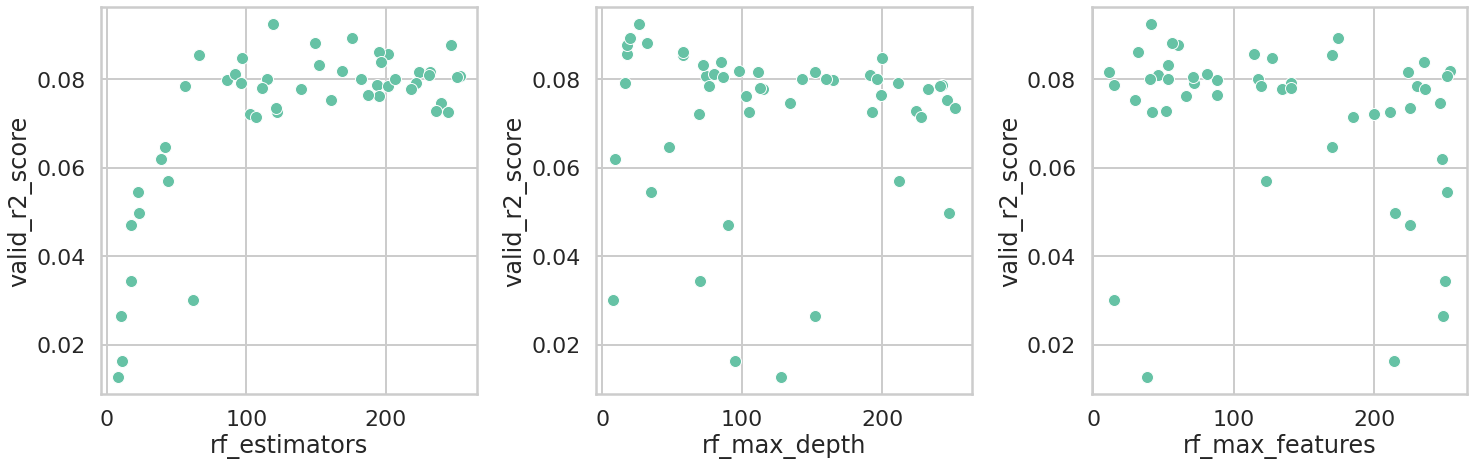

In [88]:
fig, ax = plt.subplots(1,3,figsize=(21,7))
sns.scatterplot(data=perf_df, x="rf_estimators", y="valid_r2_score", ax=ax[0])
sns.scatterplot(data=perf_df, x="rf_max_depth", y="valid_r2_score", ax=ax[1])
sns.scatterplot(data=perf_df, x="rf_max_features", y="valid_r2_score", ax=ax[2])
fig.tight_layout()

### Bayesian search

In [89]:
#define loss function
def lossfn(p):
    params["rf_estimators"] = int(p["rf_estimator"])
    params["rf_max_depth"] = int(p["rf_depth"])
    params["rf_max_features"] = int(p["rf_feature"])
    
    tparam = parse.wrapper(params)
    pl = mp.ModelPipeline(tparam)
    pl.train_model()
    perf_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
    pred_results = perf_data.get_prediction_results()
    r2 = pred_results['r2_score']
    return {'loss': 1-r2, 
            'status': STATUS_OK, 
            'model': tparam.model_tarball_path, 
            'rf_estimator': params["rf_estimators"],
            'rf_depth': params["rf_max_depth"],
            'rf_feature': params["rf_max_features"]}

space = {
    "rf_estimator": hp.uniform("rf_estimator", 8, 256),
    "rf_depth": hp.uniform("rf_depth", 8, 256),
    "rf_feature": hp.uniform("rf_feature", 8, 256)
}

In [90]:
trials = Trials()
best = fmin(lossfn, space, algo=tpe.suggest, max_evals=5, trials=trials)

number of features: 1024
  0%|          | 0/5 [00:35<?, ?it/s, best loss: ?]

2021-04-06 04:06:43,177 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.339 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
  0%|          | 0/5 [00:38<?, ?it/s, best loss: ?]

2021-04-06 04:07:05,424 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/23017ac3-9a66-4fb4-96c4-2144c2c96166/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_23017ac3-9a66-4fb4-96c4-2144c2c96166.tar.gz
  0%|          | 0/5 [01:00<?, ?it/s, best loss: ?]

2021-04-06 04:07:06,121 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/23017ac3-9a66-4fb4-96c4-2144c2c96166/model_metrics.json


number of features: 1024
 20%|██        | 1/5 [01:35<04:01, 60.40s/it, best loss: 0.9285529441858991]

2021-04-06 04:07:43,721 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.340 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.
 20%|██        | 1/5 [01:38<04:01, 60.40s/it, best loss: 0.9285529441858991]

2021-04-06 04:07:48,589 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fa16b8a6-cb4f-483b-b273-2505e505f8f9/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_fa16b8a6-cb4f-483b-b273-2505e505f8f9.tar.gz
 20%|██        | 1/5 [01:43<04:01, 60.40s/it, best loss: 0.9285529441858991]

2021-04-06 04:07:49,034 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fa16b8a6-cb4f-483b-b273-2505e505f8f9/model_metrics.json


number of features: 1024
 40%|████      | 2/5 [02:18<02:45, 55.15s/it, best loss: 0.9285529441858991]

2021-04-06 04:08:26,533 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.333 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
 40%|████      | 2/5 [02:21<02:45, 55.15s/it, best loss: 0.9285529441858991]

2021-04-06 04:08:40,630 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/9b446e07-ad08-4b00-b003-ababe7ebcdd0/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_9b446e07-ad08-4b00-b003-ababe7ebcdd0.tar.gz
 40%|████      | 2/5 [02:35<02:45, 55.15s/it, best loss: 0.9285529441858991]

2021-04-06 04:08:41,271 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/9b446e07-ad08-4b00-b003-ababe7ebcdd0/model_metrics.json


number of features: 1024
 60%|██████    | 3/5 [03:10<01:48, 54.28s/it, best loss: 0.9174356132766103]

2021-04-06 04:09:18,622 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.335 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
 60%|██████    | 3/5 [03:13<01:48, 54.28s/it, best loss: 0.9174356132766103]

2021-04-06 04:09:28,103 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/f182ea4a-23cf-40a1-8e40-f9ebe4d4b900/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_f182ea4a-23cf-40a1-8e40-f9ebe4d4b900.tar.gz
 60%|██████    | 3/5 [03:23<01:48, 54.28s/it, best loss: 0.9174356132766103]

2021-04-06 04:09:28,881 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/f182ea4a-23cf-40a1-8e40-f9ebe4d4b900/model_metrics.json


number of features: 1024
 80%|████████  | 4/5 [03:58<00:52, 52.28s/it, best loss: 0.9174356132766103]

2021-04-06 04:10:06,323 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.344 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.
 80%|████████  | 4/5 [04:01<00:52, 52.28s/it, best loss: 0.9174356132766103]

2021-04-06 04:10:15,416 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6ed5a58e-87b5-4f71-bf1a-d7e339be10ba/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6ed5a58e-87b5-4f71-bf1a-d7e339be10ba.tar.gz
 80%|████████  | 4/5 [04:09<00:52, 52.28s/it, best loss: 0.9174356132766103]

2021-04-06 04:10:15,528 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6ed5a58e-87b5-4f71-bf1a-d7e339be10ba/model_metrics.json


100%|██████████| 5/5 [04:09<00:00, 49.96s/it, best loss: 0.9148991870749018]


(0.2, 0.6)

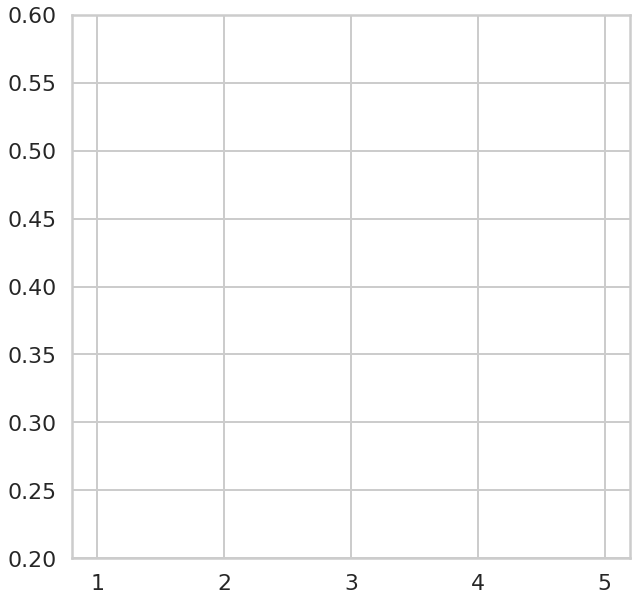

In [91]:
r2_list = [1-trials.trials[i]["result"]["loss"] for i in range(len(trials.trials))]
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.lineplot(x=list(range(1,len(trials.trials)+1)), y=r2_list, ax=ax)
ax.set_ylim(0.2,0.6)

In [92]:
rfe_list = [trials.trials[i]["result"]["rf_estimator"] for i in range(len(trials.trials))]
rfd_list = [trials.trials[i]["result"]["rf_depth"] for i in range(len(trials.trials))]
rff_list = [trials.trials[i]["result"]["rf_feature"] for i in range(len(trials.trials))]

In [93]:
perf_df = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": r2_list})
perf_df.sort_values(by="valid_r2_score", ascending=False)

,rf_estimators,rf_max_depth,rf_max_features,valid_r2_score
4,122,14,139,0.085101
2,122,147,131,0.082564
3,145,255,49,0.078899
0,137,136,221,0.071447
1,78,233,10,0.061240


#### Save Bayesian optimization trial object and continue later

In [94]:
# save the trial object
trial_file = os.path.join("hp_trial.pkl")
with open(trial_file, "wb") as f:
    pickle.dump(trials, f)

In [95]:
# load the trial object
with open(trial_file, "rb") as f:
    new_trials = pickle.load(f)

In [96]:
# continue HPO
best = fmin(lossfn, space, algo=tpe.suggest, max_evals=50, trials=new_trials)

number of features: 1024
  0%|          | 0/45 [00:35<?, ?it/s, best loss: ?]

2021-04-06 04:10:53,608 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.345 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.
  0%|          | 0/45 [00:38<?, ?it/s, best loss: ?]

2021-04-06 04:11:00,988 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/a06058f2-f255-4ab3-b5e0-04c16543e55e/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_a06058f2-f255-4ab3-b5e0-04c16543e55e.tar.gz
  0%|          | 0/45 [00:45<?, ?it/s, best loss: ?]

2021-04-06 04:11:01,540 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/a06058f2-f255-4ab3-b5e0-04c16543e55e/model_metrics.json


number of features: 1024
  2%|▏         | 1/45 [01:20<33:22, 45.51s/it, best loss: 0.9148991870749018]

2021-04-06 04:11:39,316 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.359 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.
  2%|▏         | 1/45 [01:24<33:22, 45.51s/it, best loss: 0.9148991870749018]

2021-04-06 04:11:52,525 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/802f9a32-7ce2-4d32-b574-73fbe9e2c056/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_802f9a32-7ce2-4d32-b574-73fbe9e2c056.tar.gz
  2%|▏         | 1/45 [01:37<33:22, 45.51s/it, best loss: 0.9148991870749018]

2021-04-06 04:11:53,100 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/802f9a32-7ce2-4d32-b574-73fbe9e2c056/model_metrics.json


number of features: 1024
  4%|▍         | 2/45 [02:12<33:54, 47.32s/it, best loss: 0.9148991870749018]

2021-04-06 04:12:31,000 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.356 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
  4%|▍         | 2/45 [02:15<33:54, 47.32s/it, best loss: 0.9148991870749018]

2021-04-06 04:12:45,833 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fc403f9e-6477-4a05-9093-7a77ad496aa9/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_fc403f9e-6477-4a05-9093-7a77ad496aa9.tar.gz
  4%|▍         | 2/45 [02:30<33:54, 47.32s/it, best loss: 0.9148991870749018]

2021-04-06 04:12:46,658 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fc403f9e-6477-4a05-9093-7a77ad496aa9/model_metrics.json


number of features: 1024
  7%|▋         | 3/45 [03:05<34:26, 49.19s/it, best loss: 0.914843193553458]

2021-04-06 04:13:24,397 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.359 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.
  7%|▋         | 3/45 [03:09<34:26, 49.19s/it, best loss: 0.914843193553458]

2021-04-06 04:13:31,462 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/993cf926-6178-4a58-be90-f6ac7384f10b/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_993cf926-6178-4a58-be90-f6ac7384f10b.tar.gz
  7%|▋         | 3/45 [03:15<34:26, 49.19s/it, best loss: 0.914843193553458]

2021-04-06 04:13:31,812 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/993cf926-6178-4a58-be90-f6ac7384f10b/model_metrics.json


number of features: 1024
  9%|▉         | 4/45 [03:50<32:47, 47.98s/it, best loss: 0.914843193553458]

2021-04-06 04:14:09,424 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.354 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.
  9%|▉         | 4/45 [03:54<32:47, 47.98s/it, best loss: 0.914843193553458]

2021-04-06 04:14:14,376 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/f96bed3d-c6ef-4c8f-8436-0e44e2759c93/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_f96bed3d-c6ef-4c8f-8436-0e44e2759c93.tar.gz
  9%|▉         | 4/45 [03:58<32:47, 47.98s/it, best loss: 0.914843193553458]

2021-04-06 04:14:14,570 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/f96bed3d-c6ef-4c8f-8436-0e44e2759c93/model_metrics.json


number of features: 1024
 11%|█         | 5/45 [04:33<30:56, 46.41s/it, best loss: 0.914843193553458]

2021-04-06 04:14:52,205 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.339 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
 11%|█         | 5/45 [04:36<30:56, 46.41s/it, best loss: 0.914843193553458]

2021-04-06 04:15:06,345 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e3c69cc8-afb8-4a8d-9b34-240d573a6aed/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_e3c69cc8-afb8-4a8d-9b34-240d573a6aed.tar.gz
 11%|█         | 5/45 [04:50<30:56, 46.41s/it, best loss: 0.914843193553458]

2021-04-06 04:15:06,921 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e3c69cc8-afb8-4a8d-9b34-240d573a6aed/model_metrics.json


number of features: 1024
 13%|█▎        | 6/45 [05:26<31:19, 48.20s/it, best loss: 0.914843193553458]

2021-04-06 04:15:44,635 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.343 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.
 13%|█▎        | 6/45 [05:29<31:19, 48.20s/it, best loss: 0.914843193553458]

2021-04-06 04:16:02,359 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6fdb6dbe-97ac-45ad-a635-7f1784f4325d/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6fdb6dbe-97ac-45ad-a635-7f1784f4325d.tar.gz
 13%|█▎        | 6/45 [05:47<31:19, 48.20s/it, best loss: 0.914843193553458]

2021-04-06 04:16:03,433 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6fdb6dbe-97ac-45ad-a635-7f1784f4325d/model_metrics.json


number of features: 1024
 16%|█▌        | 7/45 [06:22<32:06, 50.69s/it, best loss: 0.914843193553458]

2021-04-06 04:16:41,091 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.352 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
 16%|█▌        | 7/45 [06:25<32:06, 50.69s/it, best loss: 0.914843193553458]

2021-04-06 04:16:49,651 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1632c537-40a2-4b27-89ad-631e79368c6b/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1632c537-40a2-4b27-89ad-631e79368c6b.tar.gz
 16%|█▌        | 7/45 [06:34<32:06, 50.69s/it, best loss: 0.914843193553458]

2021-04-06 04:16:50,137 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1632c537-40a2-4b27-89ad-631e79368c6b/model_metrics.json


number of features: 1024
 18%|█▊        | 8/45 [07:09<30:31, 49.49s/it, best loss: 0.9099332449753925]

2021-04-06 04:17:27,738 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.347 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.056 s
Loading dataset from disk.
 18%|█▊        | 8/45 [07:12<30:31, 49.49s/it, best loss: 0.9099332449753925]

2021-04-06 04:17:53,183 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1c83ebee-e53e-429e-b4c6-f120b16ac1d8/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1c83ebee-e53e-429e-b4c6-f120b16ac1d8.tar.gz
 18%|█▊        | 8/45 [07:37<30:31, 49.49s/it, best loss: 0.9099332449753925]

2021-04-06 04:17:54,042 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1c83ebee-e53e-429e-b4c6-f120b16ac1d8/model_metrics.json


number of features: 1024
 20%|██        | 9/45 [08:13<32:17, 53.82s/it, best loss: 0.9099332449753925]

2021-04-06 04:18:31,765 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.334 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.
TIMING: dataset construction took 0.055 s
Loading dataset from disk.
 20%|██        | 9/45 [08:16<32:17, 53.82s/it, best loss: 0.9099332449753925]

2021-04-06 04:18:37,929 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8e00469d-d165-47be-8ff8-bbcaaec95cf7/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_8e00469d-d165-47be-8ff8-bbcaaec95cf7.tar.gz
 20%|██        | 9/45 [08:22<32:17, 53.82s/it, best loss: 0.9099332449753925]

2021-04-06 04:18:38,090 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8e00469d-d165-47be-8ff8-bbcaaec95cf7/model_metrics.json


number of features: 1024
 22%|██▏       | 10/45 [08:57<29:40, 50.88s/it, best loss: 0.9099332449753925]

2021-04-06 04:19:15,677 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.347 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
TIMING: dataset construction took 0.058 s
Loading dataset from disk.
 22%|██▏       | 10/45 [09:00<29:40, 50.88s/it, best loss: 0.9099332449753925]

2021-04-06 04:19:25,875 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/06b4b353-1983-4e74-88a2-b0d6bfda2e61/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_06b4b353-1983-4e74-88a2-b0d6bfda2e61.tar.gz
 22%|██▏       | 10/45 [09:10<29:40, 50.88s/it, best loss: 0.9099332449753925]

2021-04-06 04:19:26,175 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/06b4b353-1983-4e74-88a2-b0d6bfda2e61/model_metrics.json


number of features: 1024
 24%|██▍       | 11/45 [09:46<28:21, 50.04s/it, best loss: 0.9099332449753925]

2021-04-06 04:20:04,546 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.341 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.
 24%|██▍       | 11/45 [09:49<28:21, 50.04s/it, best loss: 0.9099332449753925]

2021-04-06 04:20:47,547 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ed24f0ee-aecc-4d5b-a40f-6731ea8d3569/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_ed24f0ee-aecc-4d5b-a40f-6731ea8d3569.tar.gz
 24%|██▍       | 11/45 [10:32<28:21, 50.04s/it, best loss: 0.9099332449753925]

2021-04-06 04:20:48,815 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ed24f0ee-aecc-4d5b-a40f-6731ea8d3569/model_metrics.json


number of features: 1024
 27%|██▋       | 12/45 [11:08<32:54, 59.83s/it, best loss: 0.9099332449753925]

2021-04-06 04:21:26,681 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.346 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
 27%|██▋       | 12/45 [11:11<32:54, 59.83s/it, best loss: 0.9099332449753925]

2021-04-06 04:21:33,822 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/0c7359ee-cafd-4ef0-a98b-fedd0d2d7c1e/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_0c7359ee-cafd-4ef0-a98b-fedd0d2d7c1e.tar.gz
 27%|██▋       | 12/45 [11:18<32:54, 59.83s/it, best loss: 0.9099332449753925]

2021-04-06 04:21:34,529 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/0c7359ee-cafd-4ef0-a98b-fedd0d2d7c1e/model_metrics.json


number of features: 1024
 29%|██▉       | 13/45 [11:58<29:38, 55.59s/it, best loss: 0.9099332449753925]

2021-04-06 04:22:17,186 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.359 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.056 s
Loading dataset from disk.
 29%|██▉       | 13/45 [12:01<29:38, 55.59s/it, best loss: 0.9099332449753925]

2021-04-06 04:22:29,656 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ae5241d7-2eea-4969-b1b9-94b8d5ac785b/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_ae5241d7-2eea-4969-b1b9-94b8d5ac785b.tar.gz
 29%|██▉       | 13/45 [12:14<29:38, 55.59s/it, best loss: 0.9099332449753925]

2021-04-06 04:22:30,330 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ae5241d7-2eea-4969-b1b9-94b8d5ac785b/model_metrics.json


number of features: 1024
 31%|███       | 14/45 [12:49<28:45, 55.66s/it, best loss: 0.9099332449753925]

2021-04-06 04:23:07,769 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.352 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.
 31%|███       | 14/45 [12:52<28:45, 55.66s/it, best loss: 0.9099332449753925]

2021-04-06 04:23:18,604 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2e17880f-95d6-400f-a788-25ba4a7b5a2e/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_2e17880f-95d6-400f-a788-25ba4a7b5a2e.tar.gz
 31%|███       | 14/45 [13:02<28:45, 55.66s/it, best loss: 0.9099332449753925]

2021-04-06 04:23:18,901 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2e17880f-95d6-400f-a788-25ba4a7b5a2e/model_metrics.json


number of features: 1024
 33%|███▎      | 15/45 [13:37<26:45, 53.53s/it, best loss: 0.9099332449753925]

2021-04-06 04:23:56,286 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.341 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.
 33%|███▎      | 15/45 [13:41<26:45, 53.53s/it, best loss: 0.9099332449753925]

2021-04-06 04:24:09,380 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/eb7e23af-9027-4d06-8877-39415230a3ef/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_eb7e23af-9027-4d06-8877-39415230a3ef.tar.gz
 33%|███▎      | 15/45 [13:54<26:45, 53.53s/it, best loss: 0.9099332449753925]

2021-04-06 04:24:10,334 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/eb7e23af-9027-4d06-8877-39415230a3ef/model_metrics.json


number of features: 1024
 36%|███▌      | 16/45 [14:29<25:34, 52.90s/it, best loss: 0.9099332449753925]

2021-04-06 04:24:47,988 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.355 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
 36%|███▌      | 16/45 [14:32<25:34, 52.90s/it, best loss: 0.9099332449753925]

2021-04-06 04:24:57,813 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/990644e9-b740-4d2a-a6b4-c120afe256ce/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_990644e9-b740-4d2a-a6b4-c120afe256ce.tar.gz
 36%|███▌      | 16/45 [14:43<25:34, 52.90s/it, best loss: 0.9099332449753925]

2021-04-06 04:24:59,126 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/990644e9-b740-4d2a-a6b4-c120afe256ce/model_metrics.json


number of features: 1024
 38%|███▊      | 17/45 [15:18<24:06, 51.67s/it, best loss: 0.9099332449753925]

2021-04-06 04:25:36,787 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.359 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
 38%|███▊      | 17/45 [15:21<24:06, 51.67s/it, best loss: 0.9099332449753925]

2021-04-06 04:25:40,244 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ba2e7db6-d23a-444d-9cb0-b3b5c9ced1cd/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_ba2e7db6-d23a-444d-9cb0-b3b5c9ced1cd.tar.gz
 38%|███▊      | 17/45 [15:24<24:06, 51.67s/it, best loss: 0.9099332449753925]

2021-04-06 04:25:40,275 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ba2e7db6-d23a-444d-9cb0-b3b5c9ced1cd/model_metrics.json


number of features: 1024
 40%|████      | 18/45 [15:59<21:49, 48.51s/it, best loss: 0.9099332449753925]

2021-04-06 04:26:17,821 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.340 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
 40%|████      | 18/45 [16:02<21:49, 48.51s/it, best loss: 0.9099332449753925]

2021-04-06 04:26:43,142 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/3852bc61-4ac1-48ae-8c3e-77e87227f75e/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_3852bc61-4ac1-48ae-8c3e-77e87227f75e.tar.gz
 40%|████      | 18/45 [16:27<21:49, 48.51s/it, best loss: 0.9099332449753925]

2021-04-06 04:26:44,019 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/3852bc61-4ac1-48ae-8c3e-77e87227f75e/model_metrics.json


number of features: 1024
 42%|████▏     | 19/45 [17:03<23:00, 53.08s/it, best loss: 0.9099332449753925]

2021-04-06 04:27:21,621 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.352 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
 42%|████▏     | 19/45 [17:06<23:00, 53.08s/it, best loss: 0.9099332449753925]

2021-04-06 04:27:31,555 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/40d18bea-b866-418d-b2df-be87802811aa/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_40d18bea-b866-418d-b2df-be87802811aa.tar.gz
 42%|████▏     | 19/45 [17:16<23:00, 53.08s/it, best loss: 0.9099332449753925]

2021-04-06 04:27:32,325 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/40d18bea-b866-418d-b2df-be87802811aa/model_metrics.json


number of features: 1024
 44%|████▍     | 20/45 [17:51<21:31, 51.65s/it, best loss: 0.9099332449753925]

2021-04-06 04:28:09,992 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.359 s
Loading dataset from disk.
TIMING: dataset construction took 0.057 s
Loading dataset from disk.
TIMING: dataset construction took 0.056 s
Loading dataset from disk.
 44%|████▍     | 20/45 [17:54<21:31, 51.65s/it, best loss: 0.9099332449753925]

2021-04-06 04:28:26,086 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/924d03a6-7e20-492a-930d-b20b874c6156/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_924d03a6-7e20-492a-930d-b20b874c6156.tar.gz
 44%|████▍     | 20/45 [18:10<21:31, 51.65s/it, best loss: 0.9099332449753925]

2021-04-06 04:28:26,839 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/924d03a6-7e20-492a-930d-b20b874c6156/model_metrics.json


number of features: 1024
 47%|████▋     | 21/45 [18:46<21:00, 52.51s/it, best loss: 0.9099332449753925]

2021-04-06 04:29:04,593 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.344 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
 47%|████▋     | 21/45 [18:49<21:00, 52.51s/it, best loss: 0.9099332449753925]

2021-04-06 04:29:21,767 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b71fbce0-239f-4654-945e-0e823dad5b6f/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_b71fbce0-239f-4654-945e-0e823dad5b6f.tar.gz
 47%|████▋     | 21/45 [19:06<21:00, 52.51s/it, best loss: 0.9099332449753925]

2021-04-06 04:29:23,012 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b71fbce0-239f-4654-945e-0e823dad5b6f/model_metrics.json


number of features: 1024
 49%|████▉     | 22/45 [19:42<20:33, 53.61s/it, best loss: 0.9099332449753925]

2021-04-06 04:30:00,672 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.350 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
 49%|████▉     | 22/45 [19:45<20:33, 53.61s/it, best loss: 0.9099332449753925]

2021-04-06 04:30:18,595 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2b4e4e33-9fb8-4229-a3e9-f6b248994a44/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_2b4e4e33-9fb8-4229-a3e9-f6b248994a44.tar.gz
 49%|████▉     | 22/45 [20:02<20:33, 53.61s/it, best loss: 0.9099332449753925]

2021-04-06 04:30:18,795 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2b4e4e33-9fb8-4229-a3e9-f6b248994a44/model_metrics.json


number of features: 1024
 51%|█████     | 23/45 [20:38<19:53, 54.26s/it, best loss: 0.9099332449753925]

2021-04-06 04:30:56,627 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.350 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.056 s
Loading dataset from disk.
 51%|█████     | 23/45 [20:41<19:53, 54.26s/it, best loss: 0.9099332449753925]

2021-04-06 04:31:07,301 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1cae1338-cc2d-4d7d-b44a-1ac6ef4616c5/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1cae1338-cc2d-4d7d-b44a-1ac6ef4616c5.tar.gz
 51%|█████     | 23/45 [20:52<19:53, 54.26s/it, best loss: 0.9099332449753925]

2021-04-06 04:31:08,072 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1cae1338-cc2d-4d7d-b44a-1ac6ef4616c5/model_metrics.json


number of features: 1024
 53%|█████▎    | 24/45 [21:27<18:28, 52.77s/it, best loss: 0.9099332449753925]

2021-04-06 04:31:45,818 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.348 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.057 s
Loading dataset from disk.
 53%|█████▎    | 24/45 [21:30<18:28, 52.77s/it, best loss: 0.9099332449753925]

2021-04-06 04:32:03,895 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/567433d9-8a88-48f2-ae1d-22bd1bf173f3/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_567433d9-8a88-48f2-ae1d-22bd1bf173f3.tar.gz
 53%|█████▎    | 24/45 [21:48<18:28, 52.77s/it, best loss: 0.9099332449753925]

2021-04-06 04:32:04,787 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/567433d9-8a88-48f2-ae1d-22bd1bf173f3/model_metrics.json


number of features: 1024
 56%|█████▌    | 25/45 [22:24<17:59, 53.95s/it, best loss: 0.9099332449753925]

2021-04-06 04:32:42,612 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.352 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.
 56%|█████▌    | 25/45 [22:27<17:59, 53.95s/it, best loss: 0.9099332449753925]

2021-04-06 04:32:47,708 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7fad5c46-1fbc-4c80-82ed-2da250a2a07e/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_7fad5c46-1fbc-4c80-82ed-2da250a2a07e.tar.gz
 56%|█████▌    | 25/45 [22:32<17:59, 53.95s/it, best loss: 0.9099332449753925]

2021-04-06 04:32:48,115 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7fad5c46-1fbc-4c80-82ed-2da250a2a07e/model_metrics.json


number of features: 1024
 58%|█████▊    | 26/45 [23:07<16:04, 50.76s/it, best loss: 0.9099332449753925]

2021-04-06 04:33:25,611 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.357 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.058 s
Loading dataset from disk.
 58%|█████▊    | 26/45 [23:10<16:04, 50.76s/it, best loss: 0.9099332449753925]

2021-04-06 04:33:38,678 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/973bdcd4-dfd1-4463-a03d-50a3ff5fc8da/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_973bdcd4-dfd1-4463-a03d-50a3ff5fc8da.tar.gz
 58%|█████▊    | 26/45 [23:23<16:04, 50.76s/it, best loss: 0.9099332449753925]

2021-04-06 04:33:39,494 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/973bdcd4-dfd1-4463-a03d-50a3ff5fc8da/model_metrics.json


number of features: 1024
 60%|██████    | 27/45 [23:58<15:17, 50.95s/it, best loss: 0.9099332449753925]

2021-04-06 04:34:17,167 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.348 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.058 s
Loading dataset from disk.
 60%|██████    | 27/45 [24:01<15:17, 50.95s/it, best loss: 0.9099332449753925]

2021-04-06 04:34:31,577 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/150c89a5-3790-4998-8657-4ff429e1f112/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_150c89a5-3790-4998-8657-4ff429e1f112.tar.gz
 60%|██████    | 27/45 [24:15<15:17, 50.95s/it, best loss: 0.9099332449753925]

2021-04-06 04:34:31,922 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/150c89a5-3790-4998-8657-4ff429e1f112/model_metrics.json


number of features: 1024
 62%|██████▏   | 28/45 [24:51<14:33, 51.39s/it, best loss: 0.9099332449753925]

2021-04-06 04:35:09,722 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.364 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
 62%|██████▏   | 28/45 [24:54<14:33, 51.39s/it, best loss: 0.9099332449753925]

2021-04-06 04:35:13,709 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/cf6ff6bd-4567-4589-9b55-f3f947d528bb/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_cf6ff6bd-4567-4589-9b55-f3f947d528bb.tar.gz
 62%|██████▏   | 28/45 [24:57<14:33, 51.39s/it, best loss: 0.9099332449753925]

2021-04-06 04:35:13,774 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/cf6ff6bd-4567-4589-9b55-f3f947d528bb/model_metrics.json


number of features: 1024
 64%|██████▍   | 29/45 [25:32<12:56, 48.53s/it, best loss: 0.9099332449753925]

2021-04-06 04:35:51,369 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.353 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
 64%|██████▍   | 29/45 [25:36<12:56, 48.53s/it, best loss: 0.9099332449753925]

2021-04-06 04:35:55,490 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/85ecf3fc-13be-4262-83e1-e07bac38cc38/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_85ecf3fc-13be-4262-83e1-e07bac38cc38.tar.gz
 64%|██████▍   | 29/45 [25:39<12:56, 48.53s/it, best loss: 0.9099332449753925]

2021-04-06 04:35:55,528 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/85ecf3fc-13be-4262-83e1-e07bac38cc38/model_metrics.json


number of features: 1024
 67%|██████▋   | 30/45 [26:14<11:37, 46.50s/it, best loss: 0.9099332449753925]

2021-04-06 04:36:33,332 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.350 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
 67%|██████▋   | 30/45 [26:18<11:37, 46.50s/it, best loss: 0.9099332449753925]

2021-04-06 04:36:38,614 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fde029c9-08c1-4269-8d6a-5e1156a195ca/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_fde029c9-08c1-4269-8d6a-5e1156a195ca.tar.gz
 67%|██████▋   | 30/45 [26:23<11:37, 46.50s/it, best loss: 0.9099332449753925]

2021-04-06 04:36:39,148 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fde029c9-08c1-4269-8d6a-5e1156a195ca/model_metrics.json


number of features: 1024
 69%|██████▉   | 31/45 [26:58<10:38, 45.63s/it, best loss: 0.9099332449753925]

2021-04-06 04:37:16,754 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.349 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.055 s
Loading dataset from disk.
 69%|██████▉   | 31/45 [27:01<10:38, 45.63s/it, best loss: 0.9099332449753925]

2021-04-06 04:37:24,766 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/029fa734-ff5e-4830-97bc-ec8c5a2345a1/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_029fa734-ff5e-4830-97bc-ec8c5a2345a1.tar.gz
 69%|██████▉   | 31/45 [27:09<10:38, 45.63s/it, best loss: 0.9099332449753925]

2021-04-06 04:37:25,301 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/029fa734-ff5e-4830-97bc-ec8c5a2345a1/model_metrics.json


number of features: 1024
 71%|███████   | 32/45 [27:44<09:55, 45.79s/it, best loss: 0.9099332449753925]

2021-04-06 04:38:02,823 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.363 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.
 71%|███████   | 32/45 [27:47<09:55, 45.79s/it, best loss: 0.9099332449753925]

2021-04-06 04:38:18,463 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1e091d0f-16b7-443f-bb4c-27d9e3ffa126/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1e091d0f-16b7-443f-bb4c-27d9e3ffa126.tar.gz
 71%|███████   | 32/45 [28:03<09:55, 45.79s/it, best loss: 0.9099332449753925]

2021-04-06 04:38:19,370 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1e091d0f-16b7-443f-bb4c-27d9e3ffa126/model_metrics.json


number of features: 1024
 73%|███████▎  | 33/45 [28:44<09:39, 48.27s/it, best loss: 0.9099332449753925]

2021-04-06 04:39:03,397 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.356 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
 73%|███████▎  | 33/45 [28:48<09:39, 48.27s/it, best loss: 0.9099332449753925]

2021-04-06 04:39:09,009 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/9eb54f41-5c88-4640-8b57-ac11e4220b0d/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_9eb54f41-5c88-4640-8b57-ac11e4220b0d.tar.gz
 73%|███████▎  | 33/45 [28:52<09:39, 48.27s/it, best loss: 0.9099332449753925]

2021-04-06 04:39:09,037 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/9eb54f41-5c88-4640-8b57-ac11e4220b0d/model_metrics.json


number of features: 1024
 76%|███████▌  | 34/45 [29:28<08:55, 48.69s/it, best loss: 0.9099332449753925]

2021-04-06 04:39:46,617 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.356 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
 76%|███████▌  | 34/45 [29:31<08:55, 48.69s/it, best loss: 0.9099332449753925]

2021-04-06 04:40:05,649 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/62962b03-310f-4947-b36d-f30e65219797/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_62962b03-310f-4947-b36d-f30e65219797.tar.gz
 76%|███████▌  | 34/45 [29:50<08:55, 48.69s/it, best loss: 0.9099332449753925]

2021-04-06 04:40:06,394 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/62962b03-310f-4947-b36d-f30e65219797/model_metrics.json


number of features: 1024
 78%|███████▊  | 35/45 [30:25<08:32, 51.29s/it, best loss: 0.9099332449753925]

2021-04-06 04:40:43,880 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.356 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.
 78%|███████▊  | 35/45 [30:28<08:32, 51.29s/it, best loss: 0.9099332449753925]

2021-04-06 04:40:52,848 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/aebd97c4-0207-461c-b8c5-65dcd0e22490/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_aebd97c4-0207-461c-b8c5-65dcd0e22490.tar.gz
 78%|███████▊  | 35/45 [30:37<08:32, 51.29s/it, best loss: 0.9099332449753925]

2021-04-06 04:40:53,392 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/aebd97c4-0207-461c-b8c5-65dcd0e22490/model_metrics.json


number of features: 1024
 80%|████████  | 36/45 [31:12<07:30, 50.00s/it, best loss: 0.9099332449753925]

2021-04-06 04:41:30,856 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.354 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.
 80%|████████  | 36/45 [31:15<07:30, 50.00s/it, best loss: 0.9099332449753925]

2021-04-06 04:41:41,180 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/95dc614c-cabe-4fa8-8ab0-c20c617c73a8/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_95dc614c-cabe-4fa8-8ab0-c20c617c73a8.tar.gz
 80%|████████  | 36/45 [31:26<07:30, 50.00s/it, best loss: 0.9099332449753925]

2021-04-06 04:41:42,374 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/95dc614c-cabe-4fa8-8ab0-c20c617c73a8/model_metrics.json


number of features: 1024
 82%|████████▏ | 37/45 [32:01<06:37, 49.70s/it, best loss: 0.9099332449753925]

2021-04-06 04:42:19,848 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.357 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.056 s
Loading dataset from disk.
 82%|████████▏ | 37/45 [32:04<06:37, 49.70s/it, best loss: 0.9099332449753925]

2021-04-06 04:42:29,640 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b697c2f4-0c55-4e4d-a64e-4b677a0e7bc7/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_b697c2f4-0c55-4e4d-a64e-4b677a0e7bc7.tar.gz
 82%|████████▏ | 37/45 [32:14<06:37, 49.70s/it, best loss: 0.9099332449753925]

2021-04-06 04:42:30,192 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b697c2f4-0c55-4e4d-a64e-4b677a0e7bc7/model_metrics.json


number of features: 1024
 84%|████████▍ | 38/45 [32:49<05:43, 49.13s/it, best loss: 0.9099332449753925]

2021-04-06 04:43:07,554 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.351 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.
 84%|████████▍ | 38/45 [32:52<05:43, 49.13s/it, best loss: 0.9099332449753925]

2021-04-06 04:43:12,094 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/bb67f848-50f5-429e-991e-e72f94611fdb/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_bb67f848-50f5-429e-991e-e72f94611fdb.tar.gz
 84%|████████▍ | 38/45 [32:56<05:43, 49.13s/it, best loss: 0.9099332449753925]

2021-04-06 04:43:12,224 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/bb67f848-50f5-429e-991e-e72f94611fdb/model_metrics.json


number of features: 1024
 87%|████████▋ | 39/45 [33:31<04:42, 47.00s/it, best loss: 0.9099332449753925]

2021-04-06 04:43:49,599 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.345 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.
TIMING: dataset construction took 0.059 s
Loading dataset from disk.
 87%|████████▋ | 39/45 [33:34<04:42, 47.00s/it, best loss: 0.9099332449753925]

2021-04-06 04:43:56,198 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b22e3511-5f16-4b61-a027-8eea4f048d01/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_b22e3511-5f16-4b61-a027-8eea4f048d01.tar.gz
 87%|████████▋ | 39/45 [33:40<04:42, 47.00s/it, best loss: 0.9099332449753925]

2021-04-06 04:43:56,415 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b22e3511-5f16-4b61-a027-8eea4f048d01/model_metrics.json


number of features: 1024
 89%|████████▉ | 40/45 [34:15<03:50, 46.16s/it, best loss: 0.9099332449753925]

2021-04-06 04:44:34,336 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.350 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.059 s
Loading dataset from disk.
 89%|████████▉ | 40/45 [34:19<03:50, 46.16s/it, best loss: 0.9099332449753925]

2021-04-06 04:45:00,222 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fb5ec0e6-129e-497c-9205-386d103b65d9/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_fb5ec0e6-129e-497c-9205-386d103b65d9.tar.gz
 89%|████████▉ | 40/45 [34:44<03:50, 46.16s/it, best loss: 0.9099332449753925]

2021-04-06 04:45:01,048 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fb5ec0e6-129e-497c-9205-386d103b65d9/model_metrics.json


number of features: 1024
 91%|█████████ | 41/45 [35:19<03:26, 51.70s/it, best loss: 0.9099332449753925]

2021-04-06 04:45:38,442 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.346 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.
 91%|█████████ | 41/45 [35:23<03:26, 51.70s/it, best loss: 0.9099332449753925]

2021-04-06 04:45:57,158 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/0096bad7-f060-447d-8fb8-85f446df2b8a/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_0096bad7-f060-447d-8fb8-85f446df2b8a.tar.gz
 91%|█████████ | 41/45 [35:41<03:26, 51.70s/it, best loss: 0.9099332449753925]

2021-04-06 04:45:57,420 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/0096bad7-f060-447d-8fb8-85f446df2b8a/model_metrics.json


number of features: 1024
 93%|█████████▎| 42/45 [36:16<02:39, 53.10s/it, best loss: 0.9099332449753925]

2021-04-06 04:46:34,820 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.347 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.
 93%|█████████▎| 42/45 [36:19<02:39, 53.10s/it, best loss: 0.9099332449753925]

2021-04-06 04:46:51,619 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c5a441a3-3a4e-4311-88e7-a173aaa695a6/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_c5a441a3-3a4e-4311-88e7-a173aaa695a6.tar.gz
 93%|█████████▎| 42/45 [36:36<02:39, 53.10s/it, best loss: 0.9099332449753925]

2021-04-06 04:46:52,358 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c5a441a3-3a4e-4311-88e7-a173aaa695a6/model_metrics.json


number of features: 1024
 96%|█████████▌| 43/45 [37:11<01:47, 53.65s/it, best loss: 0.9099332449753925]

2021-04-06 04:47:29,959 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.354 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
TIMING: dataset construction took 0.056 s
Loading dataset from disk.
 96%|█████████▌| 43/45 [37:14<01:47, 53.65s/it, best loss: 0.9099332449753925]

2021-04-06 04:47:34,834 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/29d96559-de9d-45ec-b26b-fe9b147fef2b/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_29d96559-de9d-45ec-b26b-fe9b147fef2b.tar.gz
 96%|█████████▌| 43/45 [37:19<01:47, 53.65s/it, best loss: 0.9099332449753925]

2021-04-06 04:47:35,122 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/29d96559-de9d-45ec-b26b-fe9b147fef2b/model_metrics.json


number of features: 1024
 98%|█████████▊| 44/45 [37:54<00:50, 50.39s/it, best loss: 0.9099332449753925]

2021-04-06 04:48:12,656 Previous dataset split restored


n_cnt
[7647.]
y_means
[5.29077697]
y_stds
[0.71495872]
TIMING: dataset construction took 0.352 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
 98%|█████████▊| 44/45 [37:57<00:50, 50.39s/it, best loss: 0.9099332449753925]

2021-04-06 04:48:22,606 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/93bed5a9-f546-4482-8301-1b8739211b00/model_metadata.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_93bed5a9-f546-4482-8301-1b8739211b00.tar.gz
 98%|█████████▊| 44/45 [38:07<00:50, 50.39s/it, best loss: 0.9099332449753925]

2021-04-06 04:48:23,210 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/93bed5a9-f546-4482-8301-1b8739211b00/model_metrics.json


100%|██████████| 45/45 [38:07<00:00, 50.83s/it, best loss: 0.9099332449753925]


(0.2, 0.6)

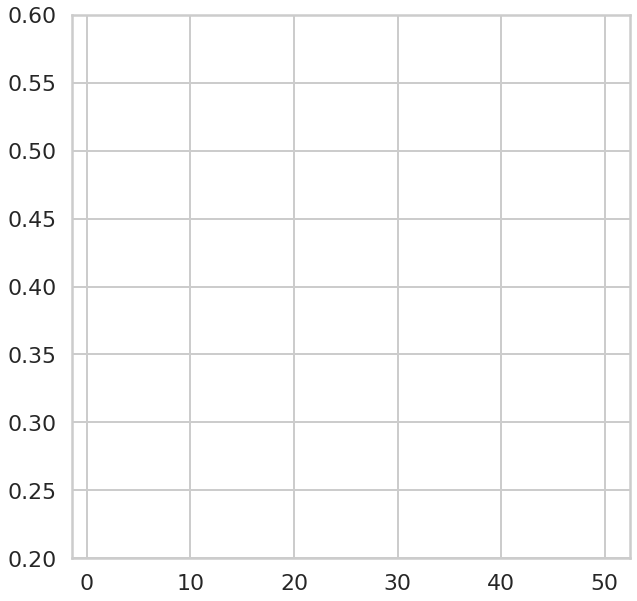

In [97]:
r2_list = [1-new_trials.trials[i]["result"]["loss"] for i in range(len(new_trials.trials))]
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.lineplot(x=list(range(1,len(new_trials.trials)+1)), y=r2_list, ax=ax)
ax.set_ylim(0.2,0.6)

In [98]:
rfe_list = [new_trials.trials[i]["result"]["rf_estimator"] for i in range(len(new_trials.trials))]
rfd_list = [new_trials.trials[i]["result"]["rf_depth"] for i in range(len(new_trials.trials))]
rff_list = [new_trials.trials[i]["result"]["rf_feature"] for i in range(len(new_trials.trials))]

In [99]:
perf_df = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": r2_list})
perf_df.sort_values(by="valid_r2_score", ascending=False)

,rf_estimators,rf_max_depth,rf_max_features,valid_r2_score
12,113,51,74,0.090067
18,170,45,76,0.089527
32,135,28,158,0.086298
7,161,118,100,0.085157
4,122,14,139,0.085101
27,230,14,177,0.083345
19,89,37,145,0.083273
47,154,69,130,0.082821
2,122,147,131,0.082564
46,126,24,254,0.082061
